In [1]:
from models.utils import set_global_seed
set_global_seed(42)
from torchvision import transforms
from torchvision.datasets import FashionMNIST, CIFAR10, CIFAR100, MNIST
from models.cleaner import NoiseCleaner
from models.predictor import Predictor

# Instance Independent

In [7]:
train_dataset = FashionMNIST(root='data', train=True, download=True)
transform = transforms.Compose([
            transforms.Grayscale(num_output_channels=3),
            transforms.Resize((224, 224)),
            transforms.ToTensor()
        ])
noise_cleaner = NoiseCleaner(train_dataset, noise_type='iin', model_save_path="fmnist/resnet18/model_resnet18_fmnist_fold_{}.pth", folds_num=5, model='resnet18', train_noise_level=0.2, epochs_num=20, transform=transform)

TypeError: NoiseCleaner.__init__() got an unexpected keyword argument 'folds_num'

In [ ]:
noise_cleaner.clean()

Training fold 1/5...


Epoch 0/20:   0%|          | 0/20 [00:08<?, ?it/s]


KeyboardInterrupt: 

In [ ]:
clean_train_dataset = noise_cleaner.clean_dataset
test_dataset = FashionMNIST(root='data', train=False, download=False)
predictor = Predictor(train_dataset=clean_train_dataset, test_dataset=test_dataset, transform=transform, num_classes=10, model_type='resnet18', batch_size=400, num_epochs=50)

In [ ]:
predictor.train(10)

In [ ]:
predictor.evaluate()

Evaluating: 100%|██████████| 25/25 [00:10<00:00,  2.49it/s]

Test Accuracy: 92.33%


0.9233

# Instance Dependent

## FMnist

In [3]:
train_dataset = FashionMNIST(root='data', train=True, download=False)
transform = transforms.Compose([
                                transforms.Grayscale(num_output_channels=3),
                                transforms.ToTensor()])
augmented_transform = transforms.Compose([
                                # transforms.RandomCrop(size=32, padding=4),
                                # transforms.RandomHorizontalFlip(),
                                transforms.Grayscale(num_output_channels=3),
                                transforms.ToTensor()])
noise_cleaner = NoiseCleaner(train_dataset, noise_type='idn', model_save_path="fmnist/resnet18/model_resnet18_fmnist_fold_{}.pth", 
                             inner_folds_num=10, outer_folds_num=10, model='wresnet50', train_noise_level=0.2, epochs_num=100, train_pairs=20000, 
                             val_pairs=10000, embedding_dimension=128, lr=1e-3, optimizer='Adam', patience=10, transform=transform,
                             weight_decay=0.0001, training_batch_size=1024, pre_trained=False, dropout_prob=0.2, contrastive_ratio=1,
                             distance_meter='euclidian', augmented_transform=augmented_transform, trainable=True, pair_validation=False,
                             label_smoothing=0.1, loss='ce')

Seed: 78


KeyboardInterrupt: 

handling big fold 1/10
number_of_pairs: 4309
Training fold 1/10...


Epoch 10/100:  11%|█         | 11/100 [04:45<38:29, 25.94s/it, val_loss=4.7, val_accuracy=10.6, train_loss=4.7, best_accuracy=10.9]

Early stopping triggered
Loading best model from checkpoint...


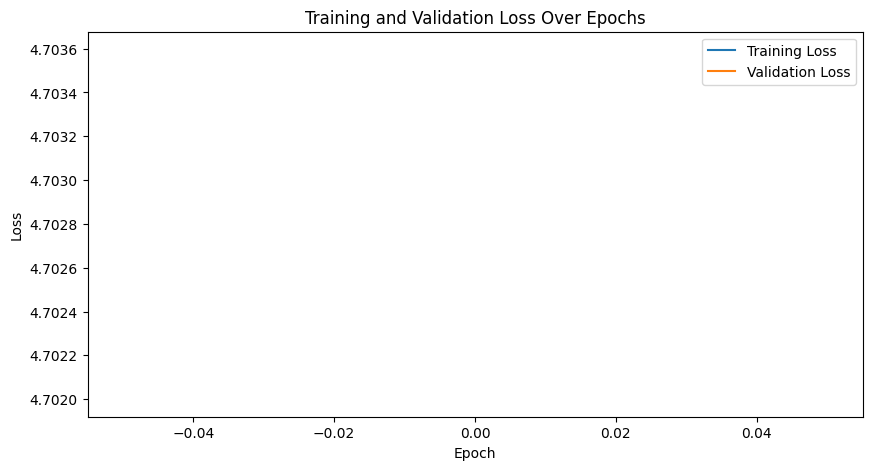

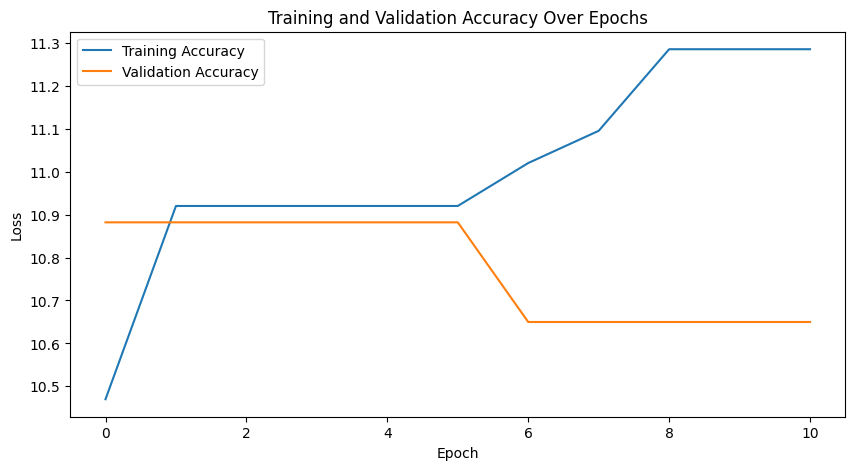

Extracting Embeddings: 100%|██████████| 485/485 [00:06<00:00, 69.79it/s]


Distance between embedding 6589 and 2885: 0.0031
Distance between embedding 6589 and 4016: 0.0037
Distance between embedding 6589 and 5862: 0.0039
Distance between embedding 6589 and 3761: 0.0016
Distance between embedding 6589 and 2201: 0.0011
Distance between embedding 6589 and 6468: 0.0009
Distance between embedding 6589 and 3726: 0.0013
Distance between embedding 6589 and 5161: 0.0011
Distance between embedding 6589 and 1572: 0.0013
Distance between embedding 6589 and 4632: 0.0019
Distance between embedding 6589 and 1639: 0.0010
Distance between embedding 6589 and 399: 0.0013
Distance between embedding 6589 and 1987: 0.0009
Distance between embedding 6589 and 7109: 0.0010
Distance between embedding 6589 and 5832: 0.0011
Distance between embedding 6589 and 6283: 0.0049
Distance between embedding 6589 and 6233: 0.0047
Distance between embedding 6589 and 354: 0.0022
Distance between embedding 6589 and 3924: 0.0028
Distance between embedding 2885 and 4016: 0.0023
Distance between embed

Testing: 100%|██████████| 485/485 [00:06<00:00, 75.06it/s]
/home/aref/.conda/envs/ml/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Test Accuracy: 10.88%
Test Precision: 0.01
Test Recall: 0.11
Test F1 Score: 0.02
Model saved to fmnist/resnet18/model_resnet18_fmnist_fold_1.pth
Finished training fold 1
Training fold 2/10...


Epoch 29/100:  29%|██▉       | 29/100 [12:49<31:24, 26.54s/it, val_loss=3.44, val_accuracy=63.5, train_loss=2.81, best_accuracy=66.8]


KeyboardInterrupt: 

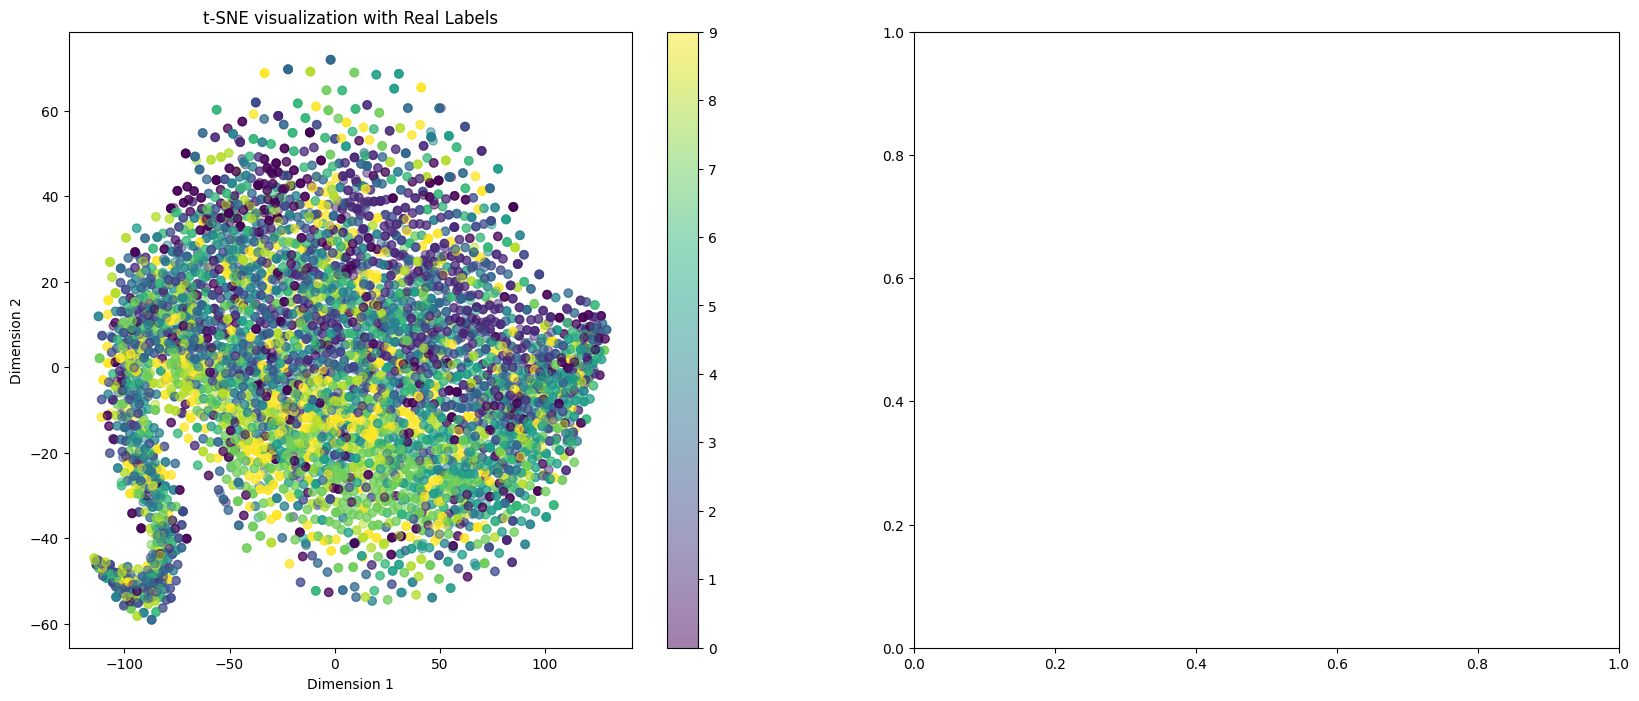

In [ ]:
noise_cleaner.clean()

In [ ]:
import models.predictor
import models
import importlib
importlib.reload(models)
from models import preact
importlib.reload(preact)
from models import predictor
importlib.reload(predictor)
from models.predictor import Predictor

In [ ]:
clean_train_dataset = noise_cleaner.clean_dataset
test_dataset = FashionMNIST(root='data', train=False, download=False)
predictor = Predictor(train_dataset=clean_train_dataset, test_dataset=test_dataset, transform=transform, num_classes=10, model_type='resnet18', batch_size=400)

In [ ]:
predictor.train(10)

Training Epoch 1/10: 100%|██████████| 113/113 [01:40<00:00,  1.12it/s]


Validation Accuracy: 93.46%
Epoch 1/10, Loss: 0.24129432162879844


Training Epoch 2/10: 100%|██████████| 113/113 [01:39<00:00,  1.13it/s]


Validation Accuracy: 96.31%
Epoch 2/10, Loss: 0.12274887458940523


Training Epoch 3/10: 100%|██████████| 113/113 [01:39<00:00,  1.13it/s]


Validation Accuracy: 97.07%
Epoch 3/10, Loss: 0.08064110191390578


Training Epoch 4/10: 100%|██████████| 113/113 [01:39<00:00,  1.14it/s]


Validation Accuracy: 96.81%
Epoch 4/10, Loss: 0.07340764353233101


Training Epoch 5/10: 100%|██████████| 113/113 [01:39<00:00,  1.14it/s]


Validation Accuracy: 96.51%
Epoch 5/10, Loss: 0.059963096196936294


Training Epoch 6/10: 100%|██████████| 113/113 [01:38<00:00,  1.15it/s]


Validation Accuracy: 97.89%
Epoch 6/10, Loss: 0.0528966288980657


Training Epoch 7/10: 100%|██████████| 113/113 [01:40<00:00,  1.13it/s]


Validation Accuracy: 97.85%
Epoch 7/10, Loss: 0.03885995962582858


Training Epoch 8/10: 100%|██████████| 113/113 [01:40<00:00,  1.13it/s]


Validation Accuracy: 97.95%
Epoch 8/10, Loss: 0.03452066272760915


Training Epoch 9/10: 100%|██████████| 113/113 [01:40<00:00,  1.12it/s]


Validation Accuracy: 98.30%
Epoch 9/10, Loss: 0.030963845262551203


Training Epoch 10/10: 100%|██████████| 113/113 [01:39<00:00,  1.13it/s]


Validation Accuracy: 98.22%
Epoch 10/10, Loss: 0.02610123477282777


In [ ]:
predictor.evaluate()

Evaluating: 100%|██████████| 25/25 [00:11<00:00,  2.25it/s]

Test Accuracy: 90.21%


0.9021

## CIFAR 10

In [ ]:
train_dataset = CIFAR10(root='data', train=True, download=True)
transform = transforms.Compose([
                                # transforms.Grayscale(num_output_channels=3),
                                transforms.ToTensor(),
                                transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))])

augmented_transform = transforms.Compose([
    transforms.RandomCrop(size=32, padding=4),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(15),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.4914, 0.4822, 0.4465], std=[0.2023, 0.1994, 0.2010])
])

new_augmented_transform = transforms.Compose([
    transforms.RandomRotation(degrees=15),        # Random rotation within 15 degrees
    transforms.RandomHorizontalFlip(p=0.5),      # Random horizontal flip
    transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)), # Width and height shift
    transforms.RandomResizedCrop(size=32, scale=(0.9, 1.0)),  # Zoom-like effect
    transforms.ToTensor(),                        # Convert images to PyTorch tensors
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)) # Normalize
])

noise_cleaner = NoiseCleaner(train_dataset, noise_type='idn', model_save_path="cifar10/resnet50/model_resnet50_cifar10_fold_{}.pth", 
                             inner_folds_num=10, outer_folds_num=10, model='resnet50', train_noise_level=0.2, epochs_num=1000, train_pairs=200000, 
                             val_pairs=20000, embedding_dimension=64, lr=5e-5, optimizer='Adam', patience=8, transform=transform,
                             weight_decay=5e-4, training_batch_size=2048, pre_trained=True, dropout_prob=0.5, contrastive_ratio=1,
                             distance_meter='euclidian', augmented_transform=augmented_transform, trainable=True, pair_validation=False,
                             label_smoothing=0.1, loss='ce', margin=2, freeze_epoch=None, noisy_indices_path='cifar10/resnet50/fold{}_noisy_indices.csv',
                             prediction_path='cifar10/resnet50/fold{}_analysis.csv', mistakes_count=10, relabeling_range=range(6, 11))

Files already downloaded and verified
Seed: 51
noise count: 10208 out of 50000 data


In [3]:
noise_cleaner.save_noisy_dataset('cleaned', 'dirty')

100%|██████████| 50000/50000 [00:03<00:00, 12964.02it/s]

Noisy dataset saved to cleaned/dirty.pkl


In [5]:
noise_cleaner.clean()

Skipping outer fold 1 with results:
80.21077283372365% accuracy in 854 data
Loaded 854 noisy indices from cifar10/resnet50/fold1_noisy_indices.csv
Skipping outer fold 2 with results:
79.53488372093022% accuracy in 860 data
Loaded 860 noisy indices from cifar10/resnet50/fold2_noisy_indices.csv
Skipping outer fold 3 with results:
78.55504587155964% accuracy in 872 data
Loaded 872 noisy indices from cifar10/resnet50/fold3_noisy_indices.csv
Skipping outer fold 4 with results:
80.02466091245375% accuracy in 811 data
Loaded 811 noisy indices from cifar10/resnet50/fold4_noisy_indices.csv
Skipping outer fold 5 with results:
80.62770562770562% accuracy in 924 data
Loaded 924 noisy indices from cifar10/resnet50/fold5_noisy_indices.csv
Skipping outer fold 6 with results:
77.0011273957159% accuracy in 887 data
Loaded 887 noisy indices from cifar10/resnet50/fold6_noisy_indices.csv
Skipping outer fold 7 with results:
79.57992998833139% accuracy in 857 data
Loaded 857 noisy indices from cifar10/resne

              precision    recall  f1-score   support

       Clean     0.9569    0.9248    0.9406     39792
       Noisy     0.7408    0.8375    0.7862     10208

    accuracy                         0.9070     50000
   macro avg     0.8488    0.8811    0.8634     50000
weighted avg     0.9127    0.9070    0.9090     50000



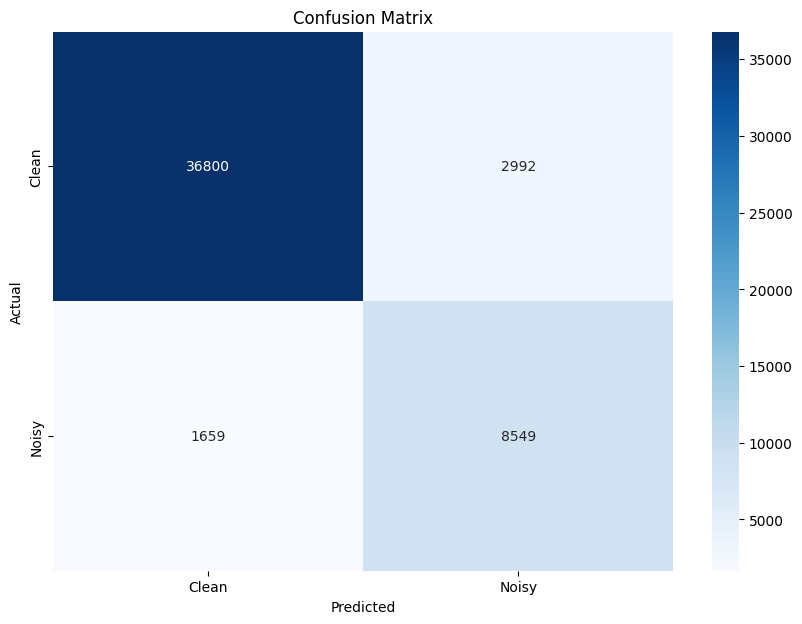

In [9]:
noise_cleaner.report(mistakes_count=9)

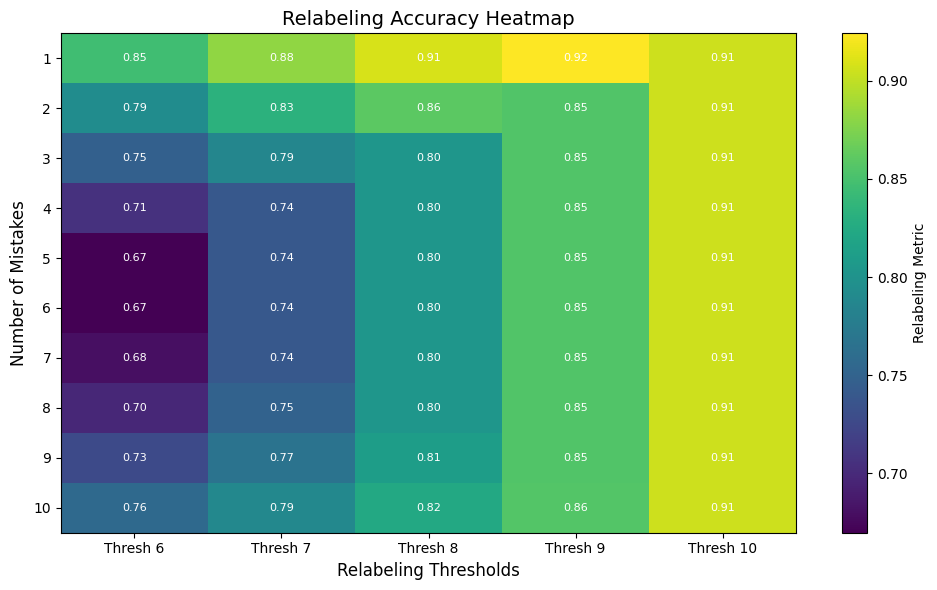

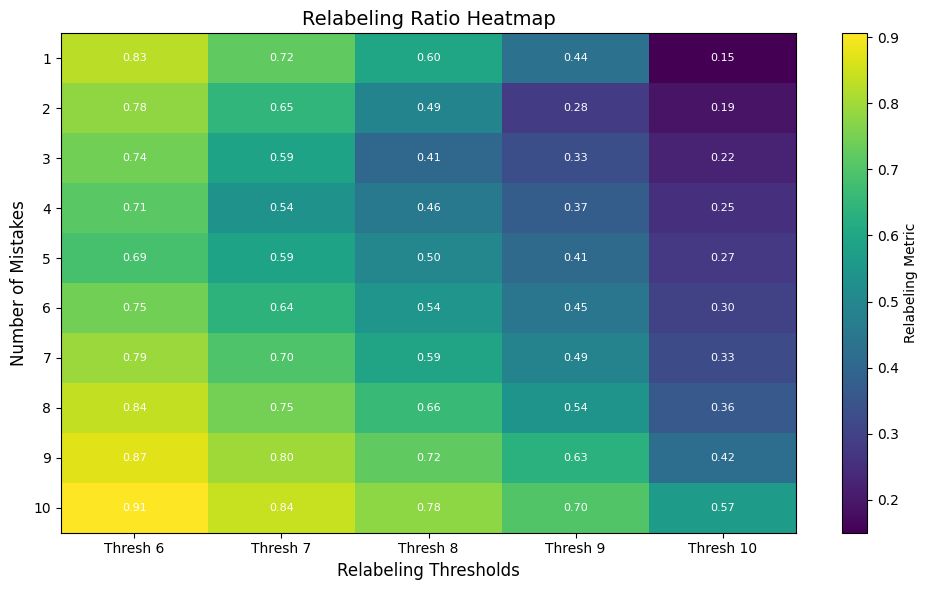

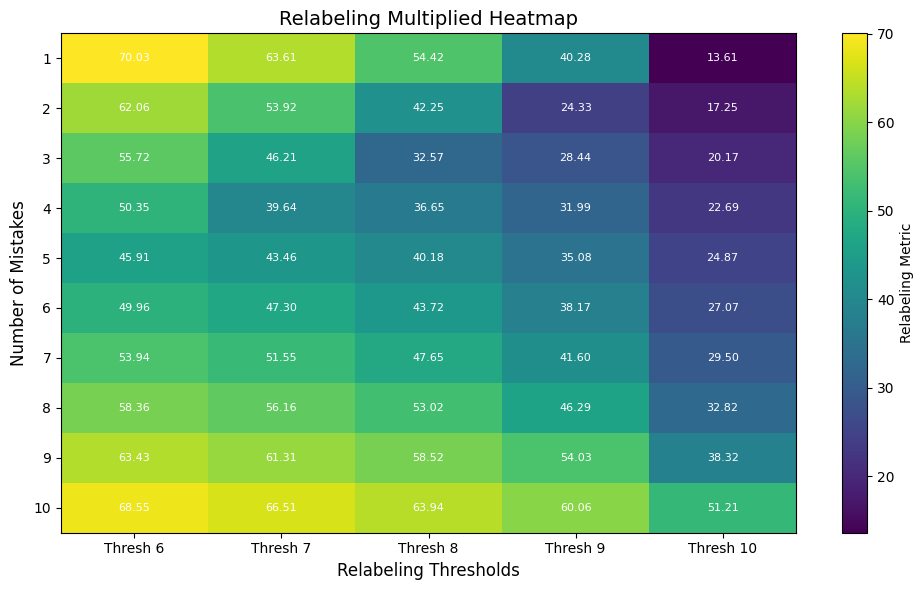

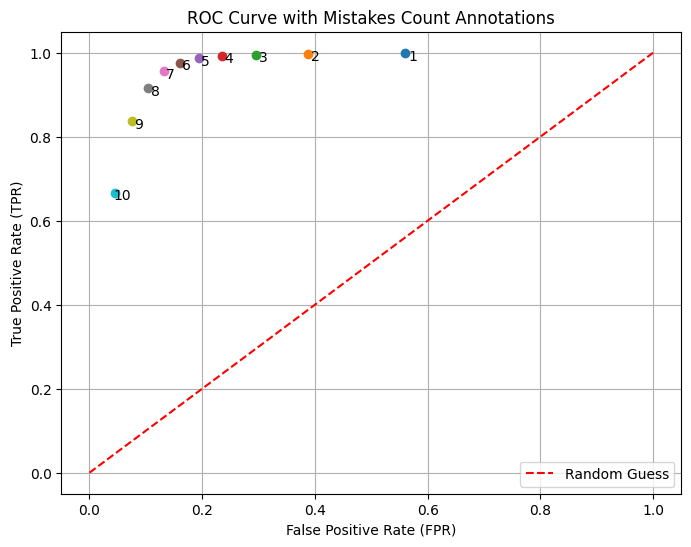

Area Under the Curve (AUC): 0.49907322987450103


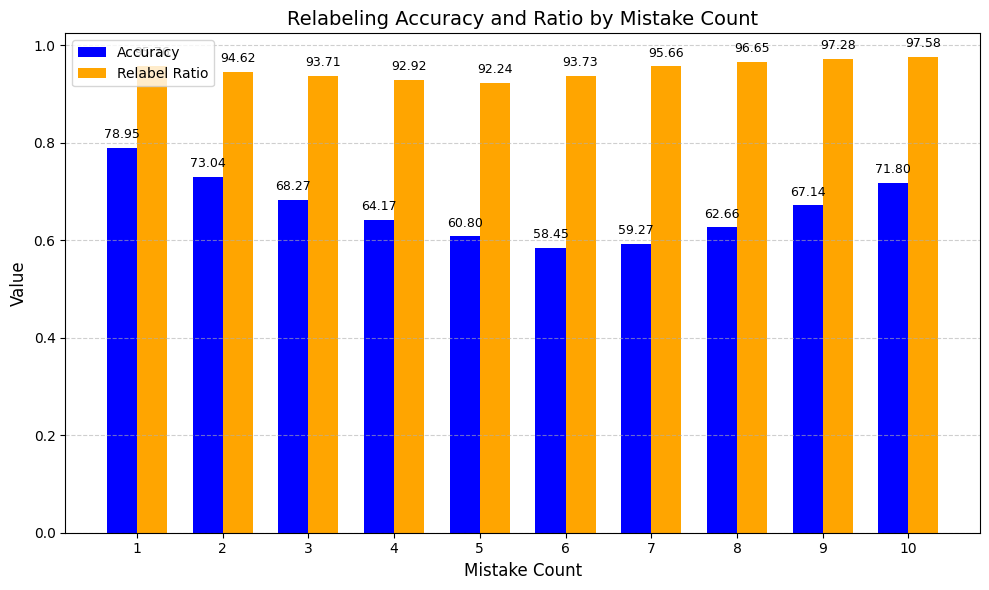

In [4]:
noise_cleaner.analyze()

Files already downloaded and verified
              precision    recall  f1-score   support

       Clean     0.9569    0.9248    0.9406     39792
       Noisy     0.7408    0.8375    0.7862     10208

    accuracy                         0.9070     50000
   macro avg     0.8488    0.8811    0.8634     50000
weighted avg     0.9127    0.9070    0.9090     50000



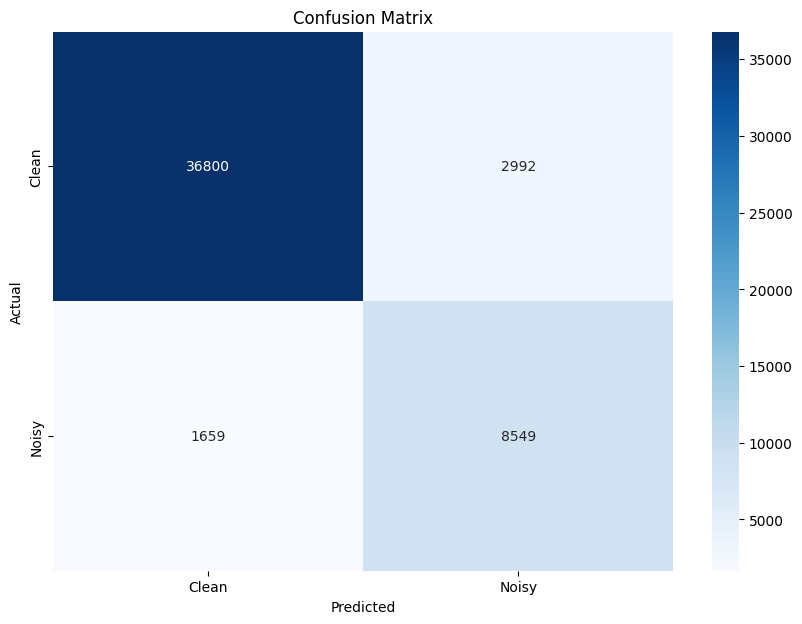

              precision    recall  f1-score   support

       Clean     0.8577    0.9343    0.8944     39792
       Noisy     0.6074    0.3960    0.4794     10208

    accuracy                         0.8244     50000
   macro avg     0.7326    0.6651    0.6869     50000
weighted avg     0.8066    0.8244    0.8097     50000



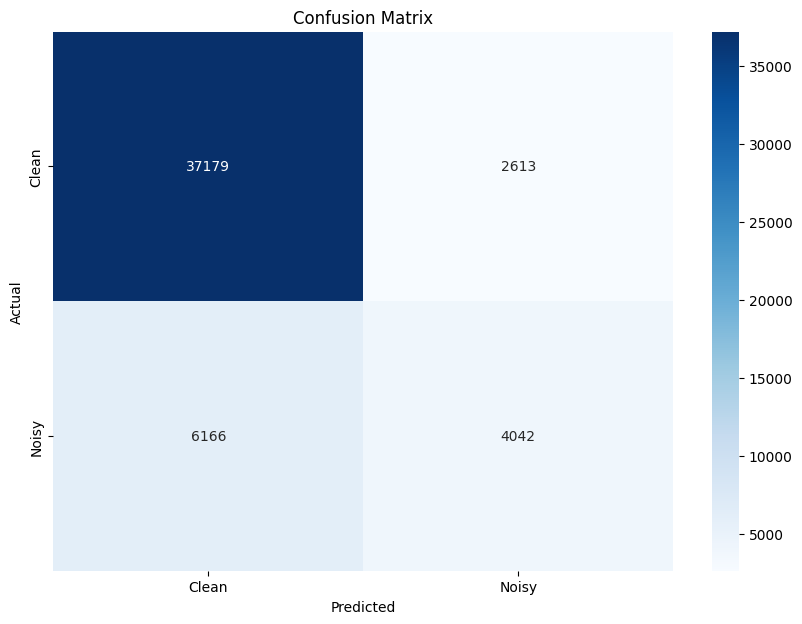

6655 removed from dataset and 4886 relabled
4.90% noise remained in 43345 data


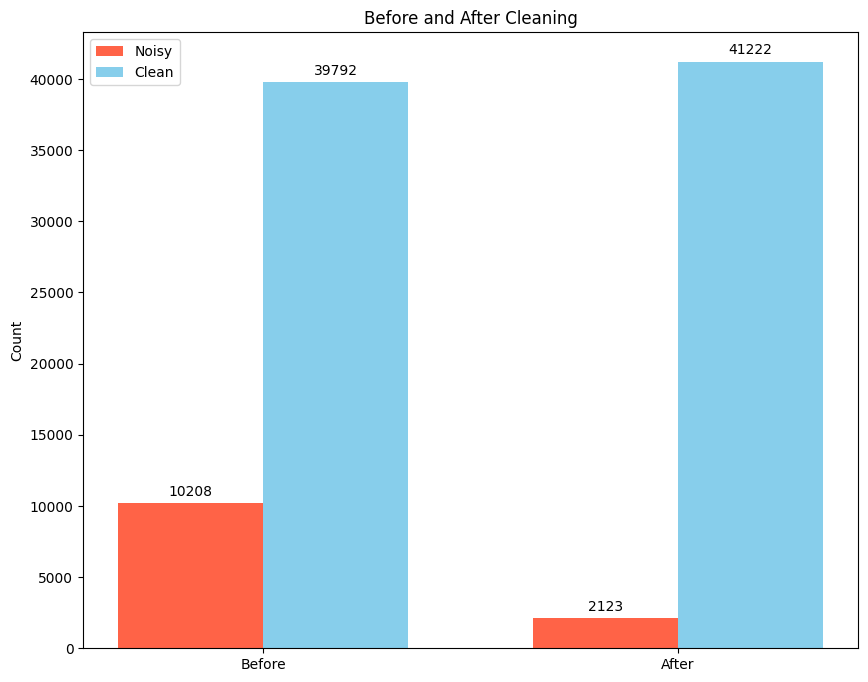

100%|██████████| 43345/43345 [05:45<00:00, 125.37it/s] 


Cleaned dataset saved to cleaned/Advanced-CIFAR10.pkl


In [4]:
dataset = CIFAR10(root='data', train=True, download=True)
manual_cleaned = noise_cleaner.advanced_clean(dataset=dataset, mistakes_count=9, relabel_threshold=10)
noise_cleaner.save_cleaned_cifar_dataset_manual(manual_cleaned, 'cleaned', 'Advanced-CIFAR10')

In [6]:
noise_cleaner.save_cleaned_cifar_dataset('cleaned', 'CIFAR10')

100%|██████████| 41150/41150 [00:01<00:00, 21517.98it/s]

Cleaned dataset saved to cleaned/CIFAR10.pkl


## CIFAR10 - 30

In [2]:
train_dataset = CIFAR10(root='data', train=True, download=True)
transform = transforms.Compose([
                                # transforms.Grayscale(num_output_channels=3),
                                transforms.ToTensor(),
                                transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))])

augmented_transform = transforms.Compose([
    transforms.RandomCrop(size=32, padding=4),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(15),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.4914, 0.4822, 0.4465], std=[0.2023, 0.1994, 0.2010])
])

new_augmented_transform = transforms.Compose([
    transforms.RandomRotation(degrees=15),        # Random rotation within 15 degrees
    transforms.RandomHorizontalFlip(p=0.5),      # Random horizontal flip
    transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)), # Width and height shift
    transforms.RandomResizedCrop(size=32, scale=(0.9, 1.0)),  # Zoom-like effect
    transforms.ToTensor(),                        # Convert images to PyTorch tensors
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)) # Normalize
])

noise_cleaner = NoiseCleaner(train_dataset, noise_type='idn', model_save_path="cifar10(30)/resnet50/model_resnet50_cifar10_fold_{}.pth", 
                             inner_folds_num=10, outer_folds_num=10, model='resnet50', train_noise_level=0.3, epochs_num=1000, train_pairs=200000, 
                             val_pairs=20000, embedding_dimension=64, lr=5e-5, optimizer='Adam', patience=10, transform=transform,
                             weight_decay=5e-4, training_batch_size=2048, pre_trained=True, dropout_prob=0.5, contrastive_ratio=1,
                             distance_meter='euclidian', augmented_transform=augmented_transform, trainable=True, pair_validation=False,
                             label_smoothing=0.1, loss='ce', margin=2, freeze_epoch=None, noisy_indices_path='cifar10(30)/resnet50/fold{}_noisy_indices.csv',
                             prediction_path='cifar10(30)/resnet50/fold{}_analysis.csv', mistakes_count=10, relabeling_range=range(6, 11))

Files already downloaded and verified
Seed: 51
noise count: 14976 out of 50000 data


In [3]:
noise_cleaner.clean()

Skipping outer fold 1 with results:
72.09847596717468% accuracy in 853 data
Loaded 853 noisy indices from cifar10(30)/resnet50/fold1_noisy_indices.csv
Skipping outer fold 2 with results:
74.22434367541766% accuracy in 838 data
Loaded 838 noisy indices from cifar10(30)/resnet50/fold2_noisy_indices.csv
Skipping outer fold 3 with results:
74.74048442906575% accuracy in 867 data
Loaded 867 noisy indices from cifar10(30)/resnet50/fold3_noisy_indices.csv
Skipping outer fold 4 with results:
78.2668500687758% accuracy in 727 data
Loaded 727 noisy indices from cifar10(30)/resnet50/fold4_noisy_indices.csv
Skipping outer fold 5 with results:
74.47306791569088% accuracy in 854 data
Loaded 854 noisy indices from cifar10(30)/resnet50/fold5_noisy_indices.csv
Skipping outer fold 6 with results:
77.1604938271605% accuracy in 810 data
Loaded 810 noisy indices from cifar10(30)/resnet50/fold6_noisy_indices.csv
Skipping outer fold 7 with results:
76.58371040723982% accuracy in 884 data
Loaded 884 noisy ind

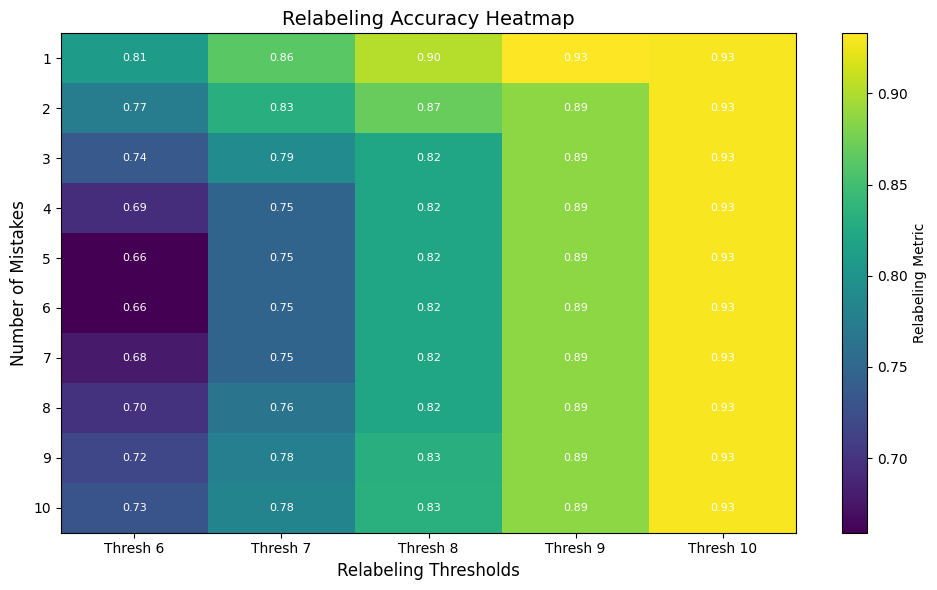

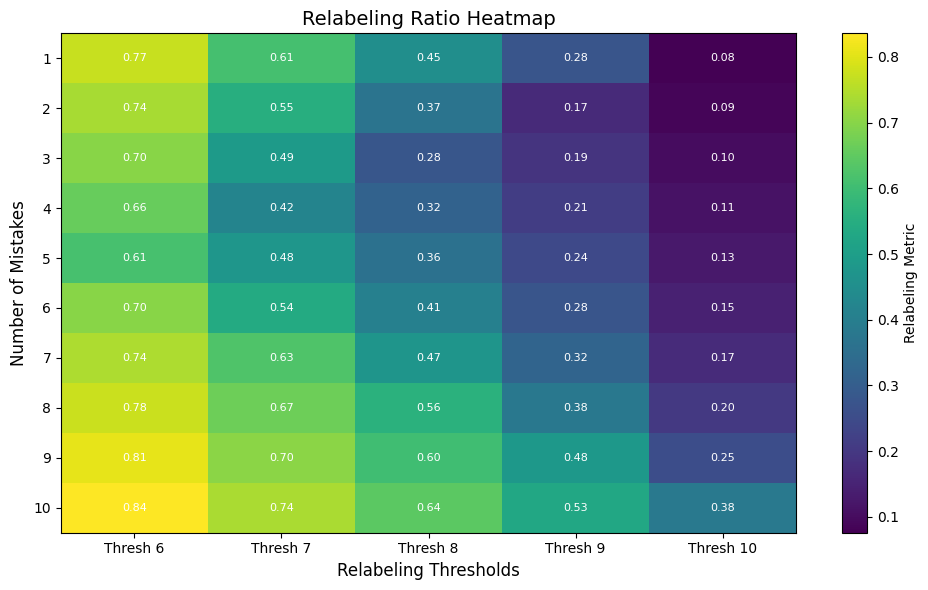

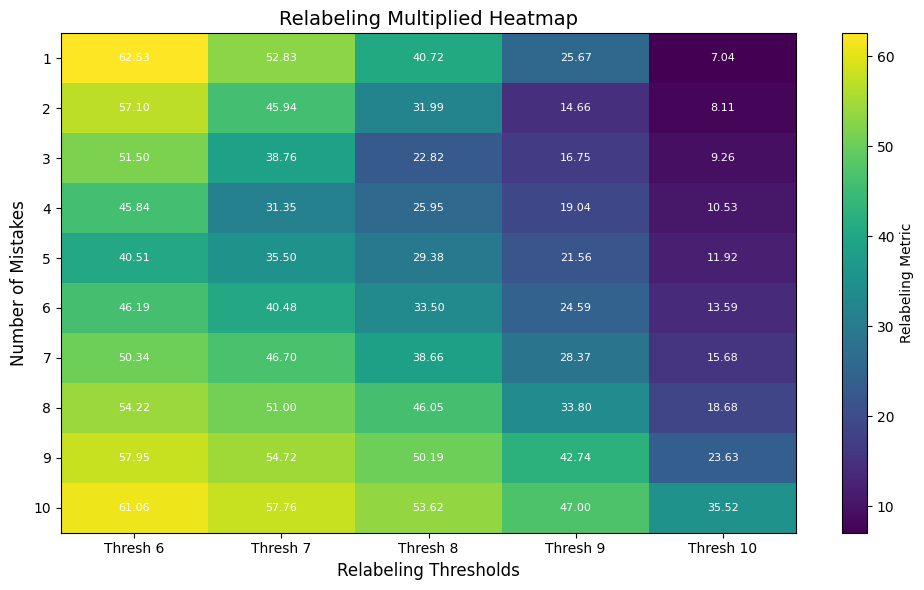

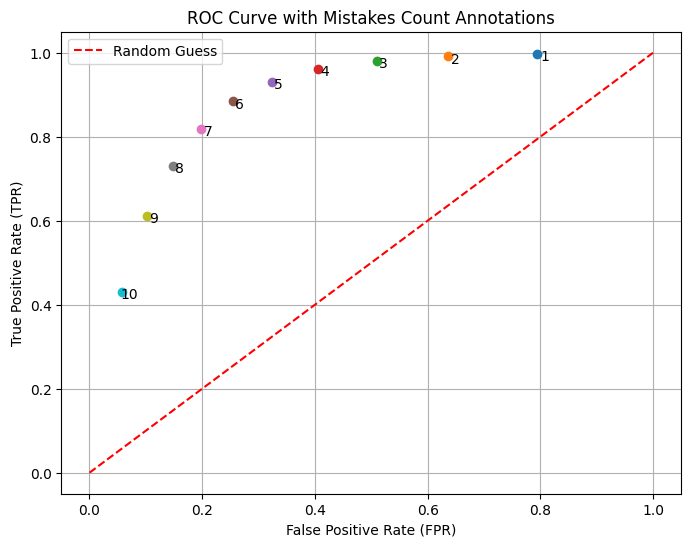

Area Under the Curve (AUC): 0.6646810900562569


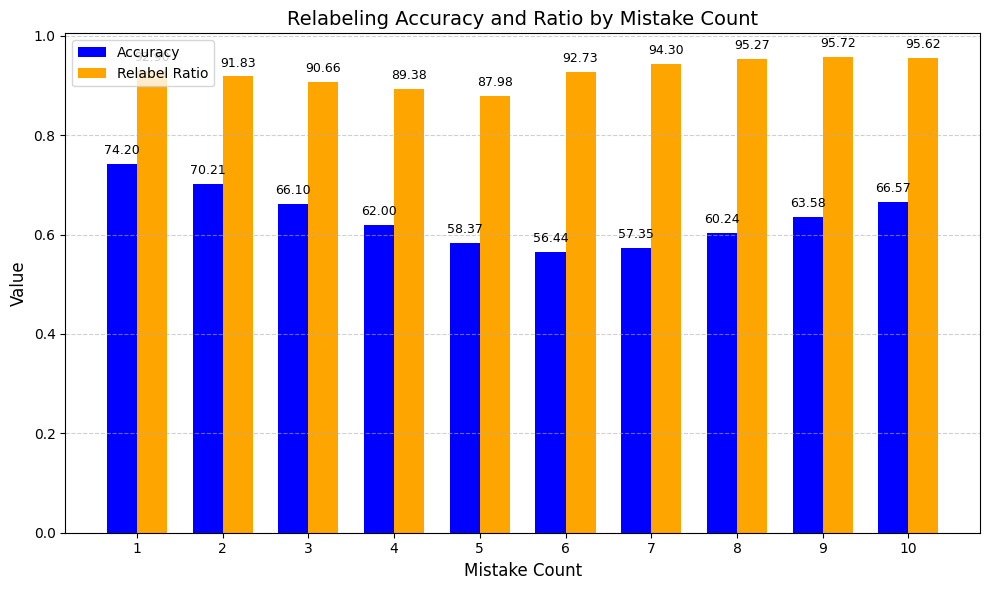

In [4]:
noise_cleaner.analyze()

Files already downloaded and verified
              precision    recall  f1-score   support

       Clean     0.9119    0.8018    0.8533     35024
       Noisy     0.6386    0.8188    0.7176     14976

    accuracy                         0.8069     50000
   macro avg     0.7752    0.8103    0.7854     50000
weighted avg     0.8300    0.8069    0.8127     50000



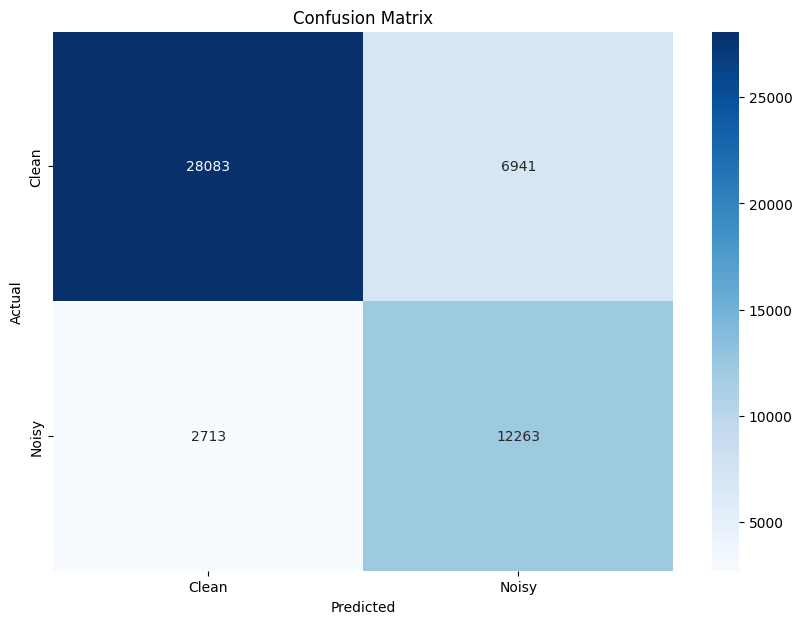

              precision    recall  f1-score   support

       Clean     0.7380    0.8395    0.7855     35024
       Noisy     0.4467    0.3030    0.3610     14976

    accuracy                         0.6788     50000
   macro avg     0.5923    0.5712    0.5733     50000
weighted avg     0.6507    0.6788    0.6584     50000



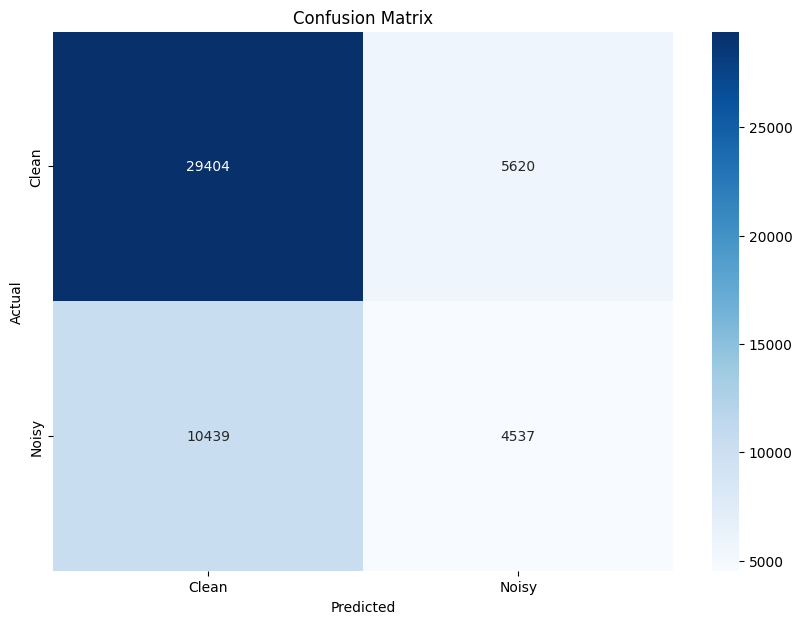

10157 removed from dataset and 9047 relabled
10.88% noise remained in 39843 data


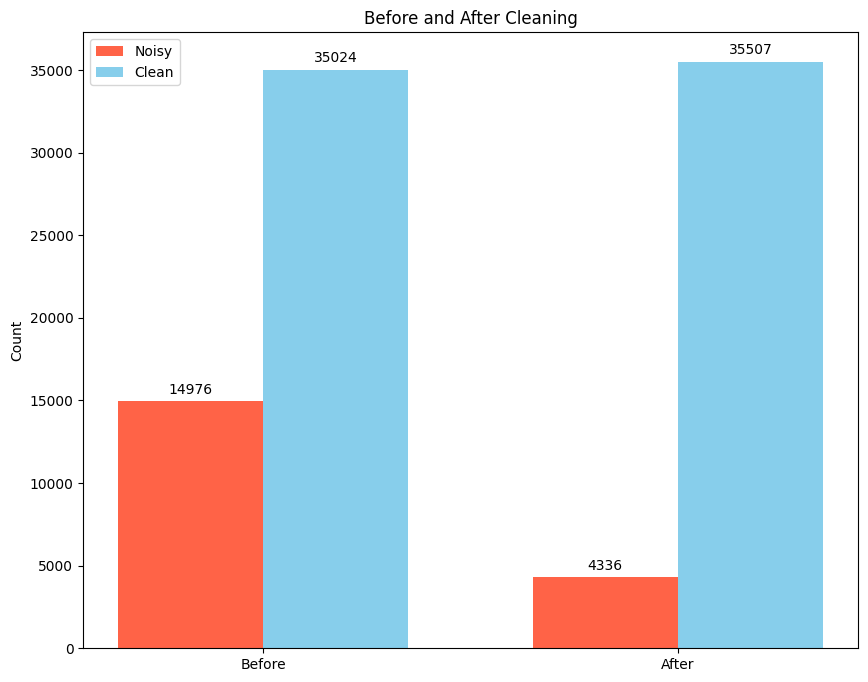

100%|██████████| 39843/39843 [00:01<00:00, 20965.34it/s]

Cleaned dataset saved to cleaned/Advanced-CIFAR10-30.pkl


In [ ]:
dataset = CIFAR10(root='data', train=True, download=True)
manual_cleaned = noise_cleaner.advanced_clean(dataset=dataset, mistakes_count=7, relabel_threshold=8)
noise_cleaner.save_cleaned_cifar_dataset_manual(manual_cleaned, 'cleaned', 'Advanced-CIFAR10-30')

# CIFAR10 - 40

In [2]:
train_dataset = CIFAR10(root='data', train=True, download=True)
transform = transforms.Compose([
                                # transforms.Grayscale(num_output_channels=3),
                                transforms.ToTensor(),
                                transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))])

augmented_transform = transforms.Compose([
    transforms.RandomCrop(size=32, padding=4),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(15),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.4914, 0.4822, 0.4465], std=[0.2023, 0.1994, 0.2010])
])

new_augmented_transform = transforms.Compose([
    transforms.RandomRotation(degrees=15),        # Random rotation within 15 degrees
    transforms.RandomHorizontalFlip(p=0.5),      # Random horizontal flip
    transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)), # Width and height shift
    transforms.RandomResizedCrop(size=32, scale=(0.9, 1.0)),  # Zoom-like effect
    transforms.ToTensor(),                        # Convert images to PyTorch tensors
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)) # Normalize
])

noise_cleaner = NoiseCleaner(train_dataset, noise_type='idn', model_save_path="cifar10(40)/resnet50/model_resnet50_cifar10_fold_{}.pth", 
                             inner_folds_num=10, outer_folds_num=10, model='resnet50', train_noise_level=0.4, epochs_num=1000, train_pairs=200000, 
                             val_pairs=20000, embedding_dimension=64, lr=5e-5, optimizer='Adam', patience=15, transform=transform,
                             weight_decay=5e-4, training_batch_size=2048, pre_trained=True, dropout_prob=0.5, contrastive_ratio=1,
                             distance_meter='euclidian', augmented_transform=new_augmented_transform, trainable=True, pair_validation=False,
                             label_smoothing=0.1, loss='ce', margin=2, freeze_epoch=None, noisy_indices_path='cifar10(40)/resnet50/fold{}_noisy_indices.csv',
                             prediction_path='cifar10(40)/resnet50/fold{}_analysis.csv', mistakes_count=10, relabeling_range=range(6, 11))

Files already downloaded and verified
Seed: 51
noise count: 19803 out of 50000 data


Skipping outer fold 1 with results:
70.13729977116705% accuracy in 874 data
Loaded 874 noisy indices from cifar10(40)/resnet50/fold1_noisy_indices.csv
Skipping outer fold 2 with results:
63.282937365010795% accuracy in 926 data
Loaded 926 noisy indices from cifar10(40)/resnet50/fold2_noisy_indices.csv
Skipping outer fold 3 with results:
69.01408450704226% accuracy in 923 data
Loaded 923 noisy indices from cifar10(40)/resnet50/fold3_noisy_indices.csv
Skipping outer fold 4 with results:
71.32947976878613% accuracy in 865 data
Loaded 865 noisy indices from cifar10(40)/resnet50/fold4_noisy_indices.csv
Skipping outer fold 5 with results:
67.70114942528735% accuracy in 870 data
Loaded 870 noisy indices from cifar10(40)/resnet50/fold5_noisy_indices.csv
handling big fold 6/10
number_of_pairs: 3591
Training fold 1/10...


Epoch 29/1000:   3%|▎         | 30/1000 [51:31<27:45:43, 103.04s/it, val_loss=4.99, val_contrastive=1.29, val_accuracy=41.3, train_loss=3.51, train_contrastive=1.44, best_accuracy=42.9, best_loss=4.88]


Early stopping triggered
Loading best model from checkpoint...


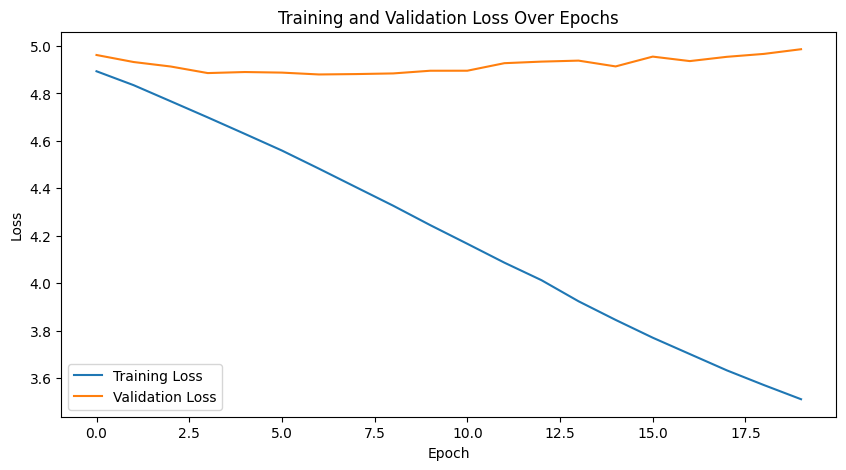

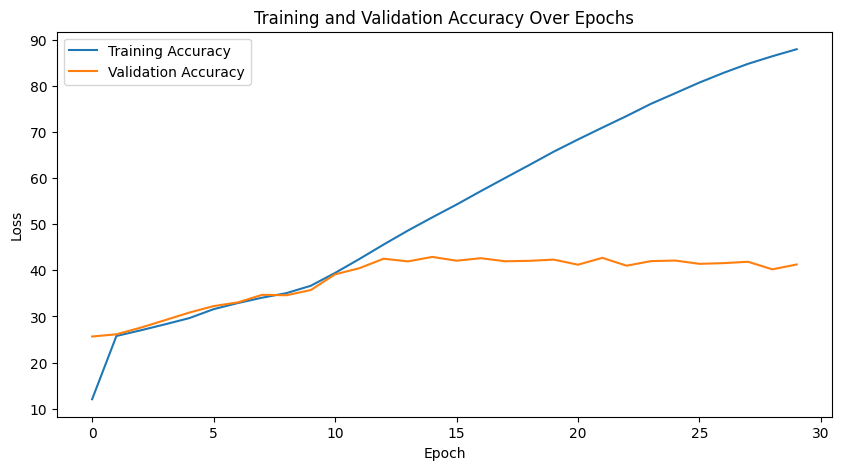

Extracting Embeddings: 100%|██████████| 51/51 [00:01<00:00, 26.86it/s]


Distance between embedding 4569 and 2990: 1.3864
Distance between embedding 4569 and 5067: 1.3497
Distance between embedding 4569 and 2268: 0.9387
Distance between embedding 4569 and 4999: 0.9579
Distance between embedding 4569 and 3603: 1.5188
Distance between embedding 4569 and 2375: 1.1287
Distance between embedding 4569 and 236: 1.2402
Distance between embedding 4569 and 5209: 0.8815
Distance between embedding 4569 and 5761: 1.1343
Distance between embedding 4569 and 237: 1.3105
Distance between embedding 4569 and 263: 1.0423
Distance between embedding 4569 and 2892: 1.6002
Distance between embedding 4569 and 198: 1.1925
Distance between embedding 4569 and 644: 0.8326
Distance between embedding 4569 and 5448: 1.5529
Distance between embedding 4569 and 4971: 1.2904
Distance between embedding 4569 and 1153: 1.1608
Distance between embedding 4569 and 6093: 1.7208
Distance between embedding 4569 and 4014: 1.1868
Distance between embedding 2990 and 5067: 1.2102
Distance between embeddin

Testing: 100%|██████████| 51/51 [00:01<00:00, 32.38it/s]
/home/aref/.conda/envs/ml/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Test Accuracy: 42.90%
Test Precision: 0.41
Test Recall: 0.43
Test F1 Score: 0.39
Model saved to cifar10(40)/resnet50/model_resnet50_cifar10_fold_1.pth
Finished training fold 1
Training fold 2/10...


Epoch 31/1000:   3%|▎         | 32/1000 [55:14<27:51:11, 103.59s/it, val_loss=4.94, val_contrastive=1.22, val_accuracy=43.1, train_loss=3.19, train_contrastive=1.41, best_accuracy=43.9, best_loss=4.79]


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 51/51 [00:01<00:00, 25.91it/s]


Test Accuracy: 43.94%
Test Precision: 0.50
Test Recall: 0.44
Test F1 Score: 0.40
Model saved to cifar10(40)/resnet50/model_resnet50_cifar10_fold_2.pth
Finished training fold 2
Training fold 3/10...


Epoch 27/1000:   3%|▎         | 28/1000 [48:32<28:05:13, 104.03s/it, val_loss=4.97, val_contrastive=1.21, val_accuracy=42.8, train_loss=3.29, train_contrastive=1.4, best_accuracy=44.1, best_loss=4.78] 


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 51/51 [00:02<00:00, 20.82it/s]
/home/aref/.conda/envs/ml/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Test Accuracy: 44.06%
Test Precision: 0.44
Test Recall: 0.44
Test F1 Score: 0.38
Model saved to cifar10(40)/resnet50/model_resnet50_cifar10_fold_3.pth
Finished training fold 3
Training fold 4/10...


Epoch 39/1000:   4%|▍         | 40/1000 [1:09:46<27:54:24, 104.65s/it, val_loss=4.84, val_contrastive=1.18, val_accuracy=44.3, train_loss=2.81, train_contrastive=1.34, best_accuracy=46.5, best_loss=4.76]


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 51/51 [00:02<00:00, 19.89it/s]


Test Accuracy: 46.53%
Test Precision: 0.46
Test Recall: 0.47
Test F1 Score: 0.46
Model saved to cifar10(40)/resnet50/model_resnet50_cifar10_fold_4.pth
Finished training fold 4
Training fold 5/10...


Epoch 29/1000:   3%|▎         | 30/1000 [52:22<28:13:19, 104.74s/it, val_loss=4.8, val_contrastive=1.23, val_accuracy=43.9, train_loss=3.48, train_contrastive=1.42, best_accuracy=46, best_loss=4.73]   


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 51/51 [00:02<00:00, 20.39it/s]


Test Accuracy: 46.04%
Test Precision: 0.51
Test Recall: 0.46
Test F1 Score: 0.42
Model saved to cifar10(40)/resnet50/model_resnet50_cifar10_fold_5.pth
Finished training fold 5
Training fold 6/10...


Epoch 25/1000:   3%|▎         | 26/1000 [45:21<28:19:01, 104.66s/it, val_loss=4.91, val_contrastive=1.24, val_accuracy=41.7, train_loss=3.73, train_contrastive=1.37, best_accuracy=45.7, best_loss=4.82]


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 51/51 [00:02<00:00, 20.09it/s]
/home/aref/.conda/envs/ml/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Test Accuracy: 45.67%
Test Precision: 0.38
Test Recall: 0.46
Test F1 Score: 0.35
Model saved to cifar10(40)/resnet50/model_resnet50_cifar10_fold_6.pth
Finished training fold 6
Training fold 7/10...


Epoch 60/1000:   6%|▌         | 61/1000 [1:46:14<27:15:29, 104.50s/it, val_loss=4.94, val_contrastive=1.16, val_accuracy=42.2, train_loss=2.46, train_contrastive=1.16, best_accuracy=44.1, best_loss=4.86]


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 51/51 [00:02<00:00, 19.62it/s]


Test Accuracy: 44.09%
Test Precision: 0.44
Test Recall: 0.44
Test F1 Score: 0.44
Model saved to cifar10(40)/resnet50/model_resnet50_cifar10_fold_7.pth
Finished training fold 7
Training fold 8/10...


Epoch 51/1000:   5%|▌         | 52/1000 [1:30:40<27:33:08, 104.63s/it, val_loss=5.14, val_contrastive=1.16, val_accuracy=41.9, train_loss=2.51, train_contrastive=1.19, best_accuracy=43.7, best_loss=4.79]


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 51/51 [00:02<00:00, 19.87it/s]


Test Accuracy: 43.67%
Test Precision: 0.44
Test Recall: 0.44
Test F1 Score: 0.44
Model saved to cifar10(40)/resnet50/model_resnet50_cifar10_fold_8.pth
Finished training fold 8
Training fold 9/10...


Epoch 38/1000:   4%|▍         | 39/1000 [1:08:01<27:56:07, 104.65s/it, val_loss=4.87, val_contrastive=1.18, val_accuracy=42.6, train_loss=2.88, train_contrastive=1.37, best_accuracy=44.7, best_loss=4.74]


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 51/51 [00:02<00:00, 20.05it/s]


Test Accuracy: 44.68%
Test Precision: 0.44
Test Recall: 0.45
Test F1 Score: 0.44
Model saved to cifar10(40)/resnet50/model_resnet50_cifar10_fold_9.pth
Finished training fold 9
Training fold 10/10...


Epoch 32/1000:   3%|▎         | 33/1000 [57:36<28:08:19, 104.76s/it, val_loss=4.79, val_contrastive=1.22, val_accuracy=43.8, train_loss=3.22, train_contrastive=1.41, best_accuracy=44.7, best_loss=4.73]


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 51/51 [00:02<00:00, 20.14it/s]
/home/aref/.conda/envs/ml/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Test Accuracy: 44.69%
Test Precision: 0.42
Test Recall: 0.45
Test F1 Score: 0.42
Model saved to cifar10(40)/resnet50/model_resnet50_cifar10_fold_10.pth
Finished training fold 10


Evaluating Noisy Samples: 100%|██████████| 10/10 [00:11<00:00,  1.18s/it]


49.877750611246945% relabeling accuracy


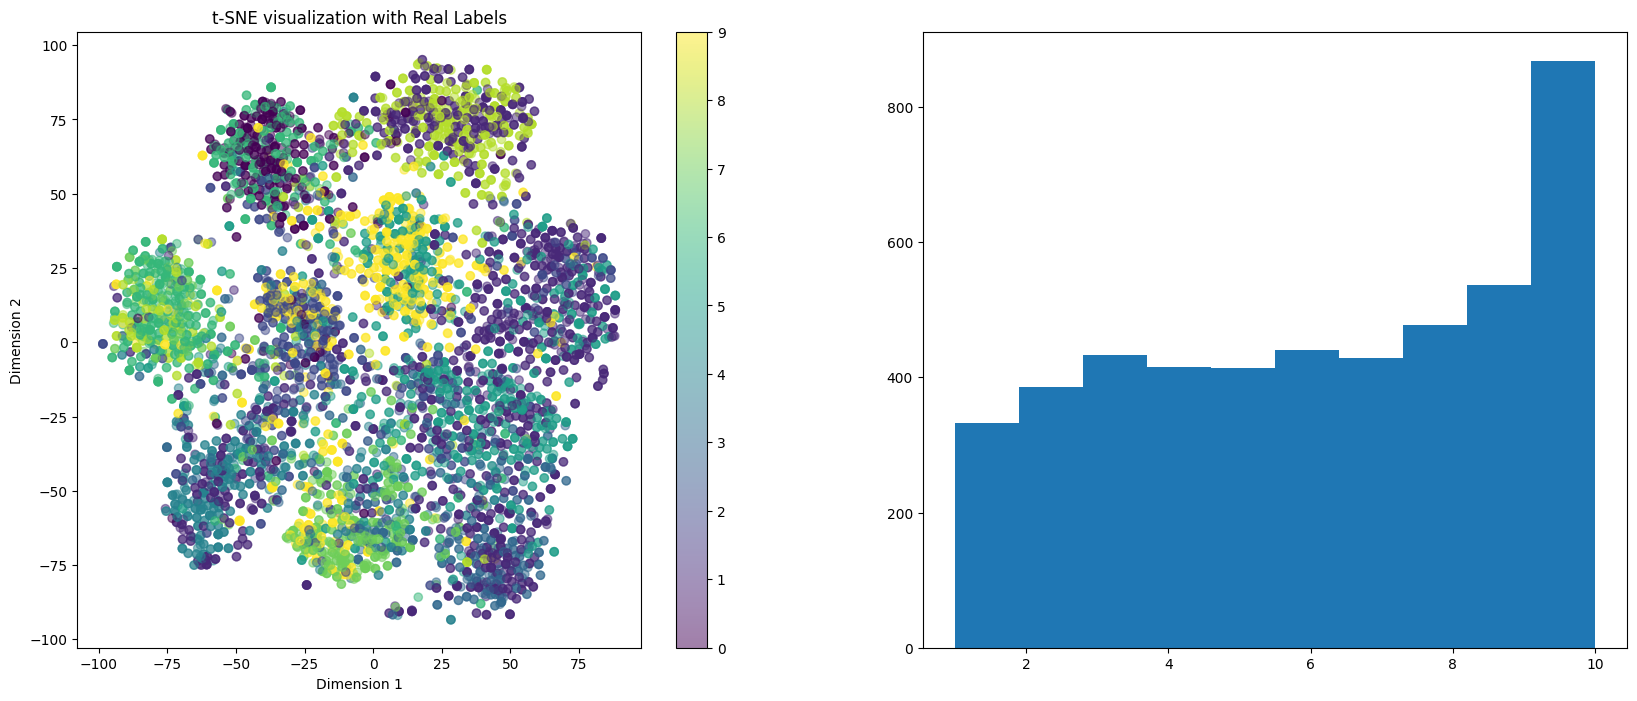

Predicted noise indices: [25, 124, 162, 187, 224, 312, 409, 499, 619, 649, 678, 702, 775, 780, 830, 973, 1100, 1208, 1228, 1239, 1289, 1298, 1304, 1342, 1447, 1516, 1550, 1611, 1635, 1648, 1745, 1806, 1825, 1835, 1849, 1869, 1987, 2037, 2099, 2136, 2171, 2190, 2231, 2470, 2556, 2698, 2787, 2903, 2966, 2969, 2972, 3030, 3043, 3220, 3294, 3311, 3337, 3363, 3386, 3470, 3523, 3578, 3606, 3779, 3786, 3808, 3930, 3956, 4027, 4034, 4293, 4416, 4429, 4486, 4542, 4607, 4616, 4623, 4671, 4847, 4940, 4952, 4997, 5053, 5270, 5294, 5333, 5377, 5523, 5632, 5638, 5639, 5650, 5705, 5714, 5720, 5754, 5812, 5922, 5943, 6081, 6093, 6634, 6687, 6731, 6740, 6743, 6911, 6921, 6999, 7043, 7073, 7173, 7194, 7205, 7220, 7242, 7260, 7352, 7353, 7671, 7709, 7912, 7952, 7964, 7967, 8106, 8109, 8115, 8124, 8185, 8237, 8304, 8346, 8362, 8395, 8475, 8485, 8498, 8516, 8564, 8570, 8705, 8775, 8798, 8803, 8812, 8816, 8869, 8871, 9069, 9084, 9112, 9145, 9151, 9194, 9225, 9319, 9321, 9331, 9463, 9495, 9538, 9550, 9551, 9

Epoch 38/1000:   4%|▍         | 39/1000 [1:08:08<27:59:09, 104.84s/it, val_loss=5.02, val_contrastive=1.22, val_accuracy=41.5, train_loss=2.98, train_contrastive=1.38, best_accuracy=44.3, best_loss=4.79]


Early stopping triggered
Loading best model from checkpoint...


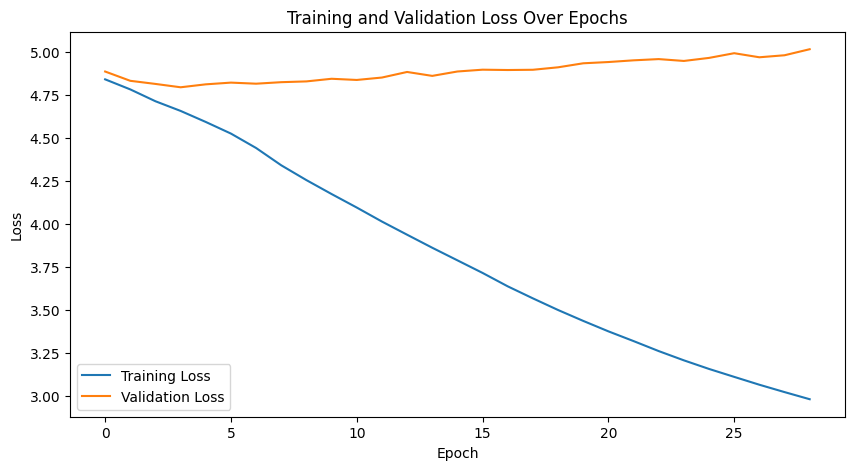

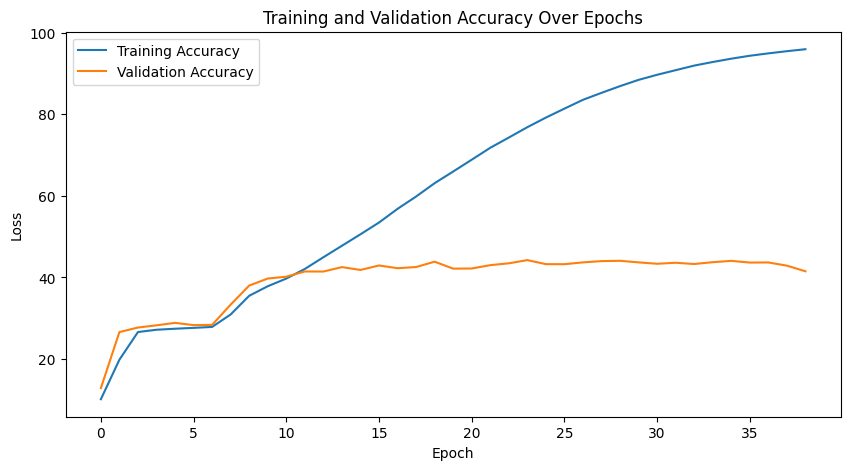

Extracting Embeddings: 100%|██████████| 51/51 [00:03<00:00, 16.72it/s]


Distance between embedding 5260 and 3927: 1.3031
Distance between embedding 5260 and 3814: 1.1907
Distance between embedding 5260 and 1947: 0.9167
Distance between embedding 5260 and 522: 1.3535
Distance between embedding 5260 and 44: 1.3439
Distance between embedding 5260 and 2679: 1.0460
Distance between embedding 5260 and 1029: 1.2523
Distance between embedding 5260 and 2452: 1.3907
Distance between embedding 5260 and 2301: 0.5627
Distance between embedding 5260 and 1016: 1.1650
Distance between embedding 5260 and 1471: 1.3079
Distance between embedding 5260 and 1246: 1.1136
Distance between embedding 5260 and 1350: 1.2917
Distance between embedding 5260 and 2481: 1.2573
Distance between embedding 5260 and 871: 1.1232
Distance between embedding 5260 and 1731: 1.3379
Distance between embedding 5260 and 4301: 1.4310
Distance between embedding 5260 and 1319: 1.5288
Distance between embedding 5260 and 2911: 1.2936
Distance between embedding 3927 and 3814: 1.0897
Distance between embeddi

Testing: 100%|██████████| 51/51 [00:02<00:00, 19.02it/s]


Test Accuracy: 44.26%
Test Precision: 0.44
Test Recall: 0.44
Test F1 Score: 0.43
Model saved to cifar10(40)/resnet50/model_resnet50_cifar10_fold_1.pth
Finished training fold 1
Training fold 2/10...


Epoch 54/1000:   6%|▌         | 55/1000 [1:35:58<27:29:09, 104.71s/it, val_loss=5.15, val_contrastive=1.15, val_accuracy=42.3, train_loss=2.57, train_contrastive=1.2, best_accuracy=43, best_loss=4.91]   


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 51/51 [00:02<00:00, 18.88it/s]


Test Accuracy: 42.99%
Test Precision: 0.43
Test Recall: 0.43
Test F1 Score: 0.43
Model saved to cifar10(40)/resnet50/model_resnet50_cifar10_fold_2.pth
Finished training fold 2
Training fold 3/10...


Epoch 35/1000:   4%|▎         | 36/1000 [1:02:54<28:04:19, 104.83s/it, val_loss=4.99, val_contrastive=1.21, val_accuracy=41.9, train_loss=3.15, train_contrastive=1.37, best_accuracy=44.3, best_loss=4.85]


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 51/51 [00:02<00:00, 19.30it/s]


Test Accuracy: 44.31%
Test Precision: 0.44
Test Recall: 0.44
Test F1 Score: 0.43
Model saved to cifar10(40)/resnet50/model_resnet50_cifar10_fold_3.pth
Finished training fold 3
Training fold 4/10...


Epoch 36/1000:   4%|▎         | 37/1000 [1:04:42<28:04:10, 104.93s/it, val_loss=4.8, val_contrastive=1.22, val_accuracy=42.9, train_loss=3.19, train_contrastive=1.42, best_accuracy=44.5, best_loss=4.74]


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 51/51 [00:02<00:00, 18.68it/s]


Test Accuracy: 44.51%
Test Precision: 0.44
Test Recall: 0.45
Test F1 Score: 0.42
Model saved to cifar10(40)/resnet50/model_resnet50_cifar10_fold_4.pth
Finished training fold 4
Training fold 5/10...


Epoch 45/1000:   5%|▍         | 46/1000 [1:20:15<27:44:33, 104.69s/it, val_loss=5.04, val_contrastive=1.2, val_accuracy=42.3, train_loss=2.83, train_contrastive=1.3, best_accuracy=43.9, best_loss=4.85]  


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 51/51 [00:02<00:00, 19.33it/s]


Test Accuracy: 43.87%
Test Precision: 0.43
Test Recall: 0.44
Test F1 Score: 0.43
Model saved to cifar10(40)/resnet50/model_resnet50_cifar10_fold_5.pth
Finished training fold 5
Training fold 6/10...


Epoch 26/1000:   3%|▎         | 27/1000 [47:17<28:24:07, 105.09s/it, val_loss=4.92, val_contrastive=1.22, val_accuracy=42.4, train_loss=3.3, train_contrastive=1.42, best_accuracy=46, best_loss=4.74]   


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 51/51 [00:02<00:00, 19.18it/s]


Test Accuracy: 46.02%
Test Precision: 0.48
Test Recall: 0.46
Test F1 Score: 0.44
Model saved to cifar10(40)/resnet50/model_resnet50_cifar10_fold_6.pth
Finished training fold 6
Training fold 7/10...


Epoch 35/1000:   4%|▎         | 36/1000 [1:03:02<28:08:18, 105.08s/it, val_loss=4.93, val_contrastive=1.18, val_accuracy=42, train_loss=2.98, train_contrastive=1.37, best_accuracy=44.6, best_loss=4.79]


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 51/51 [00:02<00:00, 19.56it/s]


Test Accuracy: 44.55%
Test Precision: 0.46
Test Recall: 0.45
Test F1 Score: 0.43
Model saved to cifar10(40)/resnet50/model_resnet50_cifar10_fold_7.pth
Finished training fold 7
Training fold 8/10...


Epoch 33/1000:   3%|▎         | 34/1000 [59:31<28:11:25, 105.06s/it, val_loss=4.95, val_contrastive=1.19, val_accuracy=41.9, train_loss=3.04, train_contrastive=1.42, best_accuracy=44.2, best_loss=4.77]


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 51/51 [00:02<00:00, 19.22it/s]


Test Accuracy: 44.20%
Test Precision: 0.44
Test Recall: 0.44
Test F1 Score: 0.44
Model saved to cifar10(40)/resnet50/model_resnet50_cifar10_fold_8.pth
Finished training fold 8
Training fold 9/10...


Epoch 47/1000:   5%|▍         | 48/1000 [1:23:50<27:42:55, 104.81s/it, val_loss=4.92, val_contrastive=1.2, val_accuracy=43.3, train_loss=2.73, train_contrastive=1.3, best_accuracy=44.8, best_loss=4.87]  


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 51/51 [00:02<00:00, 18.86it/s]


Test Accuracy: 44.77%
Test Precision: 0.45
Test Recall: 0.45
Test F1 Score: 0.45
Model saved to cifar10(40)/resnet50/model_resnet50_cifar10_fold_9.pth
Finished training fold 9
Training fold 10/10...


Epoch 52/1000:   5%|▌         | 53/1000 [1:32:37<27:35:09, 104.87s/it, val_loss=4.97, val_contrastive=1.16, val_accuracy=42, train_loss=2.57, train_contrastive=1.22, best_accuracy=44.4, best_loss=4.87]  


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 51/51 [00:02<00:00, 19.63it/s]


Test Accuracy: 44.35%
Test Precision: 0.44
Test Recall: 0.44
Test F1 Score: 0.44
Model saved to cifar10(40)/resnet50/model_resnet50_cifar10_fold_10.pth
Finished training fold 10


Evaluating Noisy Samples: 100%|██████████| 10/10 [00:11<00:00,  1.20s/it]


54.521625163827004% relabeling accuracy


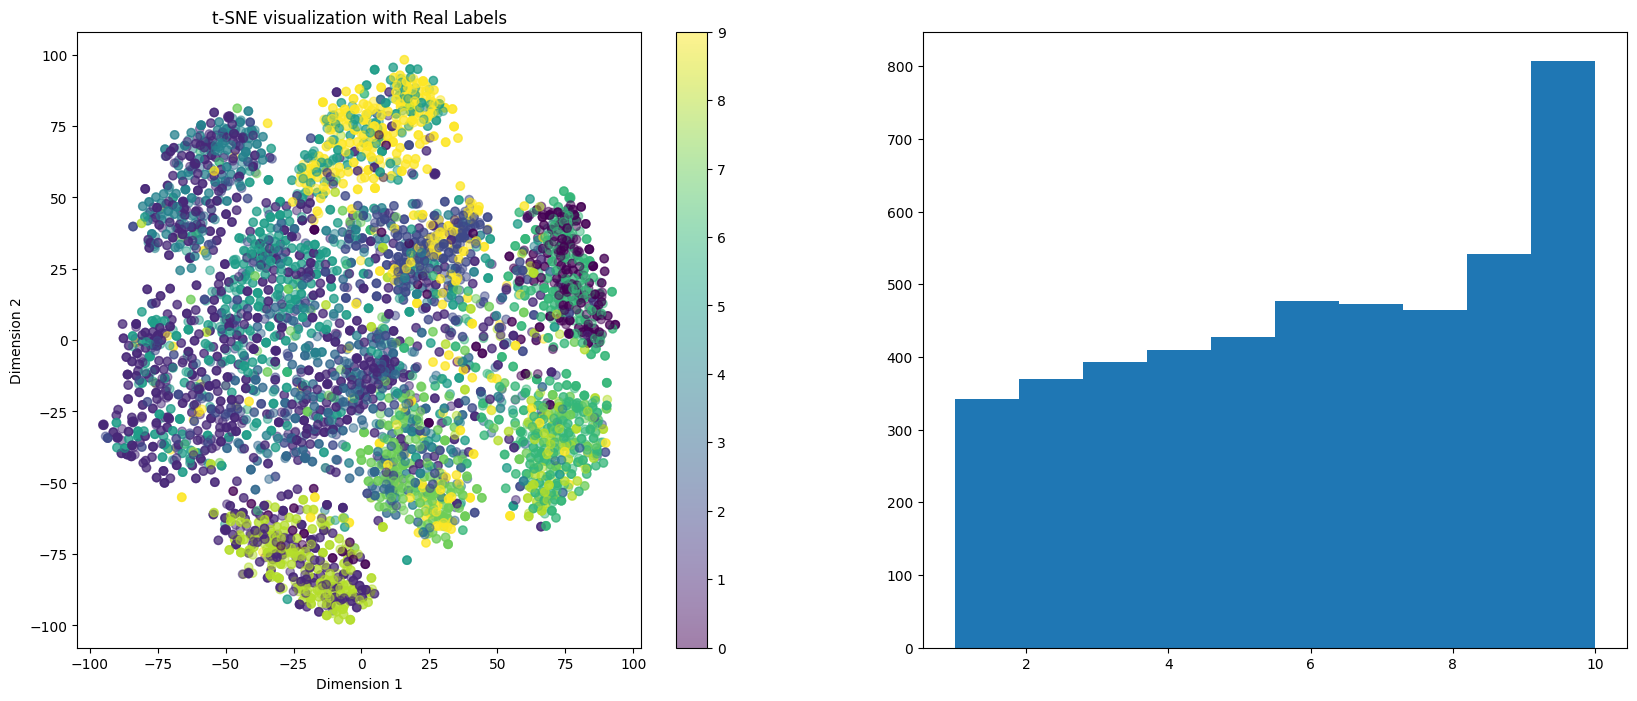

Predicted noise indices: [159, 209, 282, 303, 306, 392, 424, 502, 587, 602, 626, 648, 738, 803, 923, 1003, 1042, 1095, 1105, 1109, 1118, 1129, 1139, 1167, 1175, 1218, 1576, 1676, 1712, 1914, 1973, 1977, 2053, 2211, 2233, 2271, 2408, 2428, 2494, 2619, 2661, 2713, 2774, 2777, 2811, 2881, 2944, 2995, 3026, 3041, 3088, 3157, 3208, 3256, 3291, 3293, 3312, 3323, 3325, 3372, 3687, 3769, 3785, 3829, 3841, 3874, 3890, 3991, 4050, 4112, 4167, 4195, 4198, 4214, 4389, 4442, 4453, 4478, 4730, 4750, 4893, 4928, 4949, 4950, 4971, 5016, 5020, 5045, 5064, 5097, 5148, 5166, 5169, 5199, 5274, 5307, 5351, 5393, 5396, 5525, 5617, 5641, 5721, 5725, 5821, 5971, 5976, 6023, 6066, 6079, 6100, 6197, 6262, 6294, 6352, 6369, 6448, 6462, 6502, 6521, 6552, 6566, 6631, 6741, 6850, 6882, 7028, 7074, 7084, 7128, 7177, 7188, 7223, 7234, 7339, 7427, 7525, 7650, 7688, 7866, 7941, 7976, 8076, 8099, 8167, 8186, 8227, 8256, 8262, 8270, 8280, 8335, 8344, 8410, 8457, 8737, 8967, 9009, 9023, 9200, 9290, 9333, 9450, 9503, 9511,

Epoch 29/1000:   3%|▎         | 30/1000 [52:24<28:14:37, 104.82s/it, val_loss=4.87, val_contrastive=1.28, val_accuracy=44.1, train_loss=3.43, train_contrastive=1.42, best_accuracy=46.4, best_loss=4.8] 


Early stopping triggered
Loading best model from checkpoint...


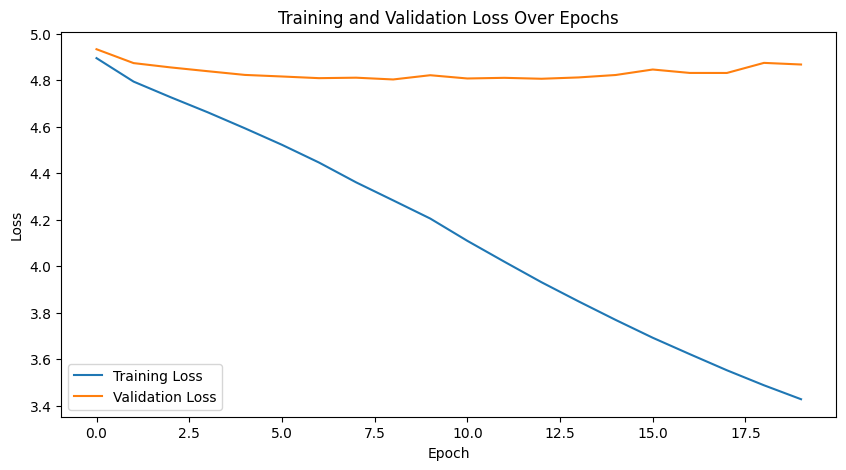

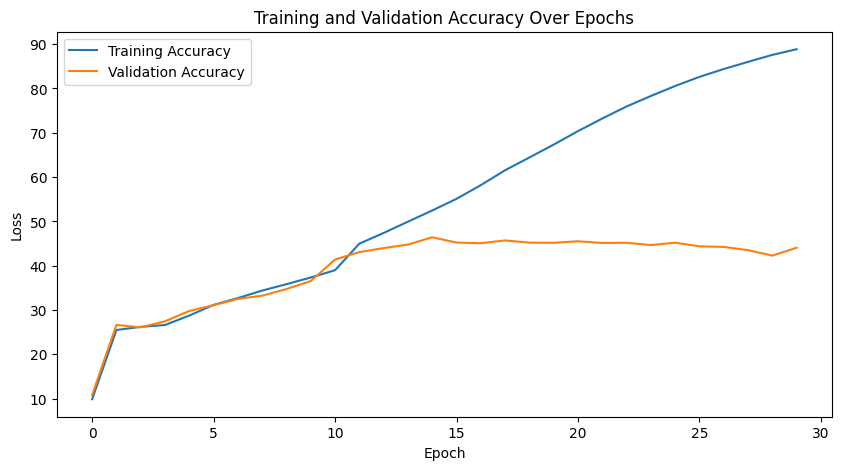

Extracting Embeddings: 100%|██████████| 51/51 [00:03<00:00, 16.91it/s]


Distance between embedding 1141 and 4419: 1.1392
Distance between embedding 1141 and 3209: 1.4852
Distance between embedding 1141 and 1783: 1.2222
Distance between embedding 1141 and 5824: 1.2267
Distance between embedding 1141 and 4435: 1.2429
Distance between embedding 1141 and 4399: 0.7952
Distance between embedding 1141 and 125: 0.9090
Distance between embedding 1141 and 5228: 1.4026
Distance between embedding 1141 and 3804: 1.5126
Distance between embedding 1141 and 3842: 1.3523
Distance between embedding 1141 and 3422: 1.3291
Distance between embedding 1141 and 3554: 1.4756
Distance between embedding 1141 and 2132: 1.4399
Distance between embedding 1141 and 5812: 1.0228
Distance between embedding 1141 and 2310: 1.3449
Distance between embedding 1141 and 3058: 1.3442
Distance between embedding 1141 and 2520: 1.2876
Distance between embedding 1141 and 3712: 1.4259
Distance between embedding 1141 and 4017: 1.3829
Distance between embedding 4419 and 3209: 0.9362
Distance between embe

Testing: 100%|██████████| 51/51 [00:02<00:00, 18.53it/s]


Test Accuracy: 46.41%
Test Precision: 0.50
Test Recall: 0.46
Test F1 Score: 0.42
Model saved to cifar10(40)/resnet50/model_resnet50_cifar10_fold_1.pth
Finished training fold 1
Training fold 2/10...


Epoch 37/1000:   4%|▍         | 38/1000 [1:06:33<28:05:02, 105.10s/it, val_loss=4.9, val_contrastive=1.21, val_accuracy=43.3, train_loss=3.03, train_contrastive=1.4, best_accuracy=47.2, best_loss=4.75]  


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 51/51 [00:02<00:00, 18.19it/s]


Test Accuracy: 47.22%
Test Precision: 0.47
Test Recall: 0.47
Test F1 Score: 0.46
Model saved to cifar10(40)/resnet50/model_resnet50_cifar10_fold_2.pth
Finished training fold 2
Training fold 3/10...


Epoch 9/1000:   1%|          | 9/1000 [15:51<29:02:42, 105.51s/it, val_loss=4.92, val_contrastive=1.19, val_accuracy=37.4, train_loss=4.84, train_contrastive=1.17, best_accuracy=37.8, best_loss=4.92]

In [ ]:
noise_cleaner.clean()

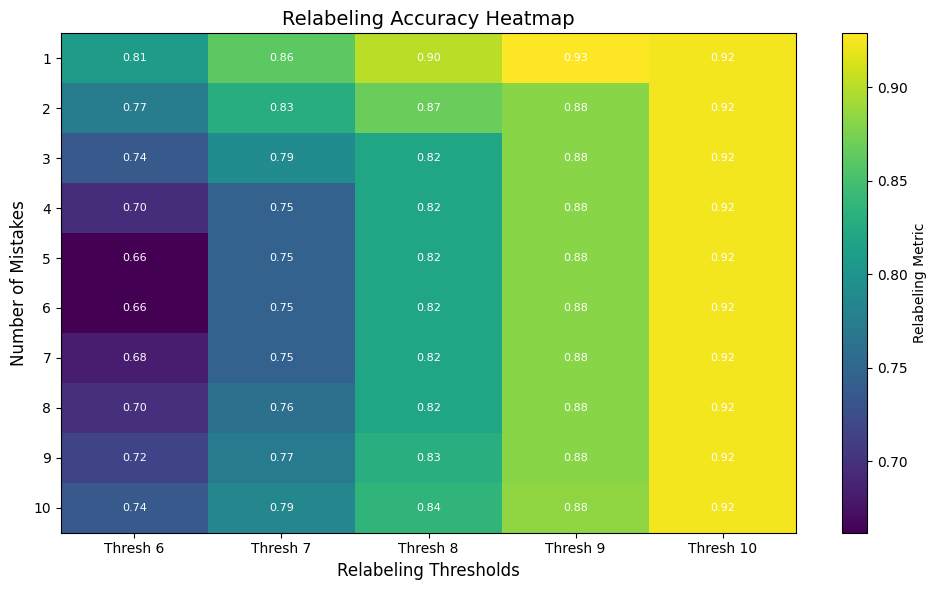

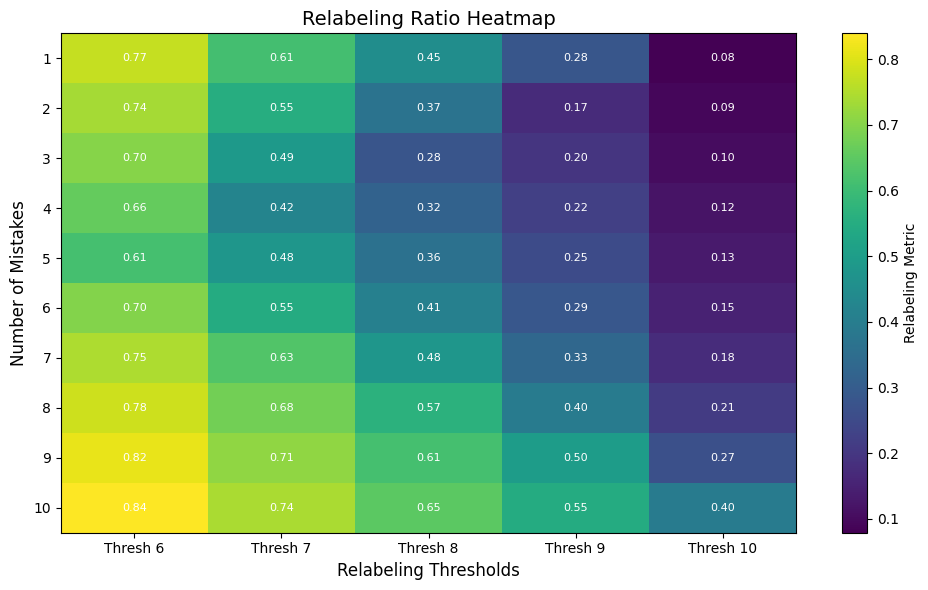

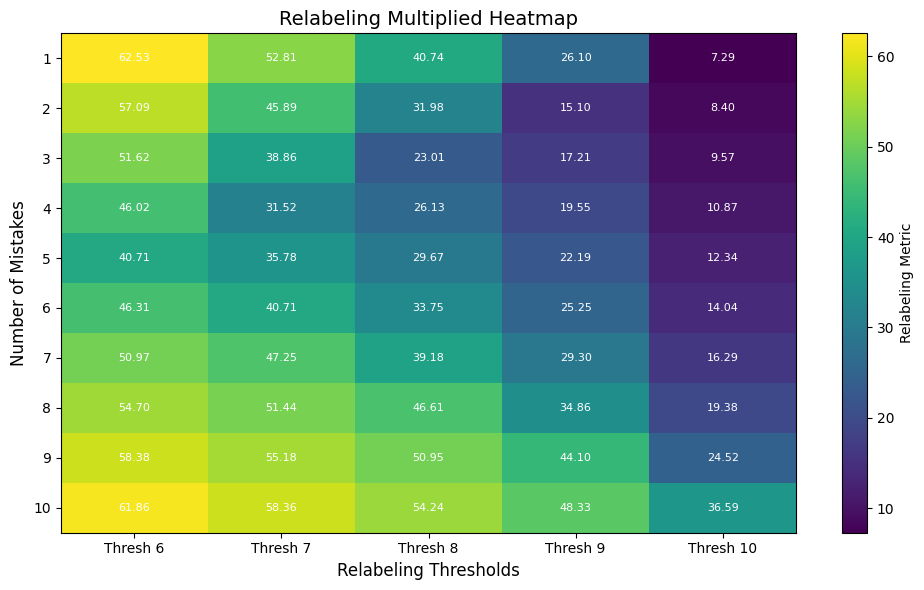

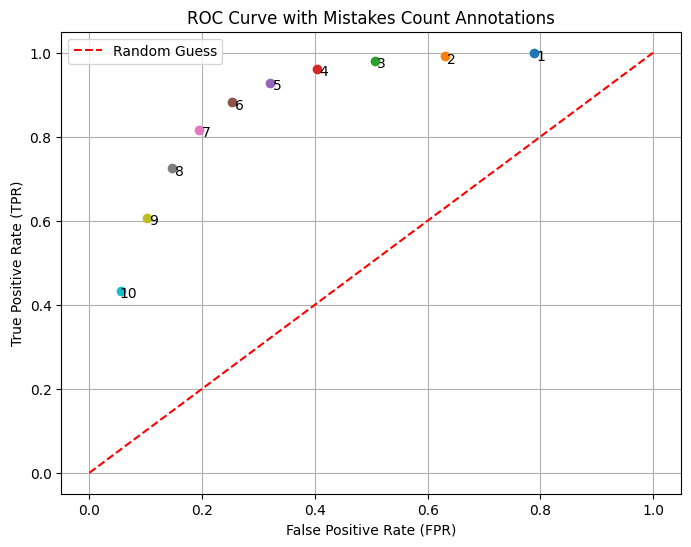

Area Under the Curve (AUC): 0.6587650269744824


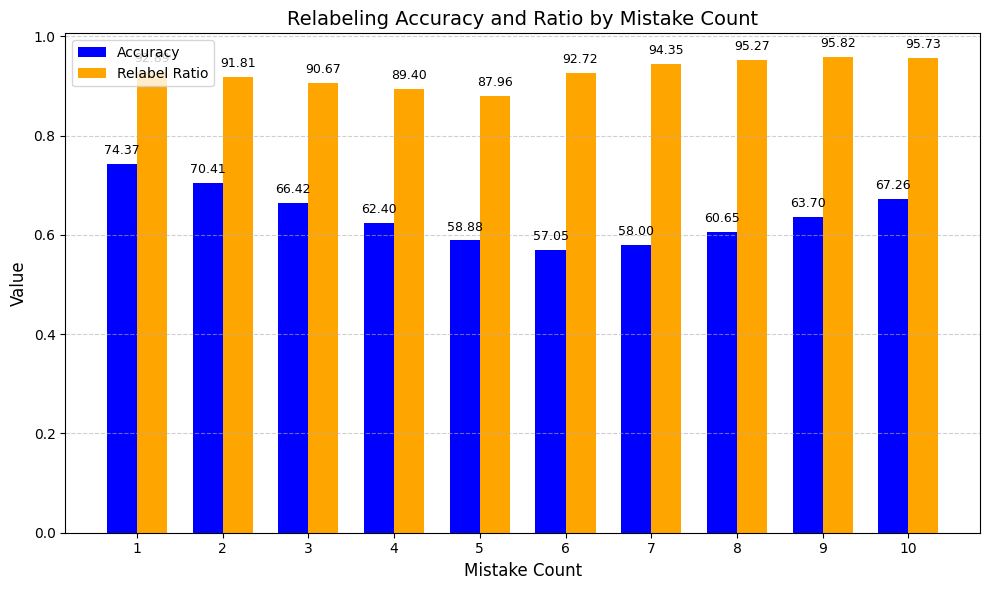

In [4]:
noise_cleaner.analyze()

Files already downloaded and verified
              precision    recall  f1-score   support

       Clean     0.9112    0.8057    0.8552     35024
       Noisy     0.6424    0.8164    0.7190     14976

    accuracy                         0.8089     50000
   macro avg     0.7768    0.8110    0.7871     50000
weighted avg     0.8307    0.8089    0.8144     50000



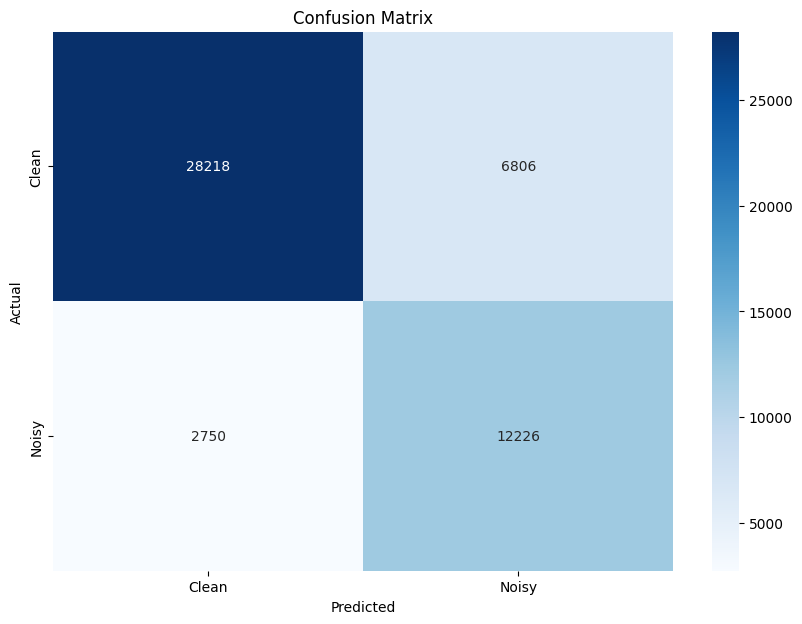

              precision    recall  f1-score   support

       Clean     0.7382    0.8444    0.7877     35024
       Noisy     0.4517    0.2997    0.3603     14976

    accuracy                         0.6813     50000
   macro avg     0.5949    0.5721    0.5740     50000
weighted avg     0.6524    0.6813    0.6597     50000



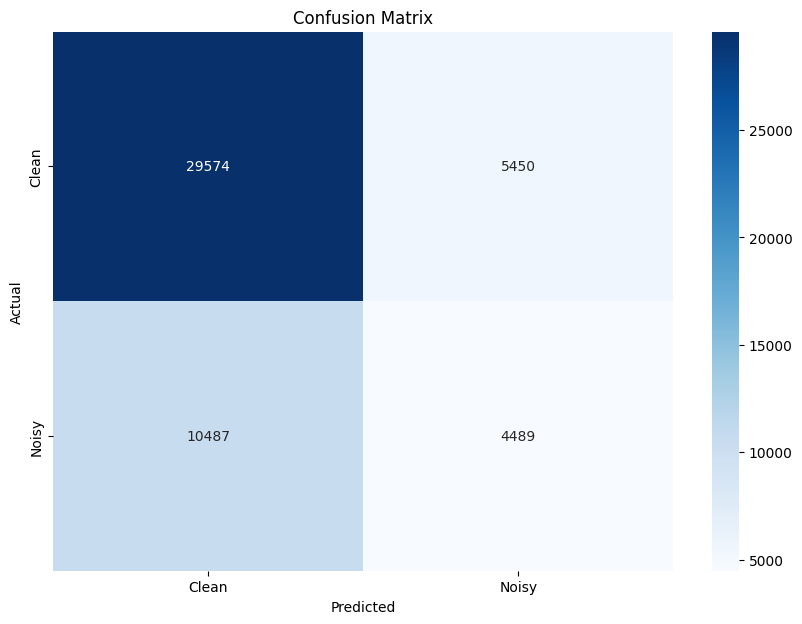

9939 removed from dataset and 9093 relabled
10.95% noise remained in 40061 data


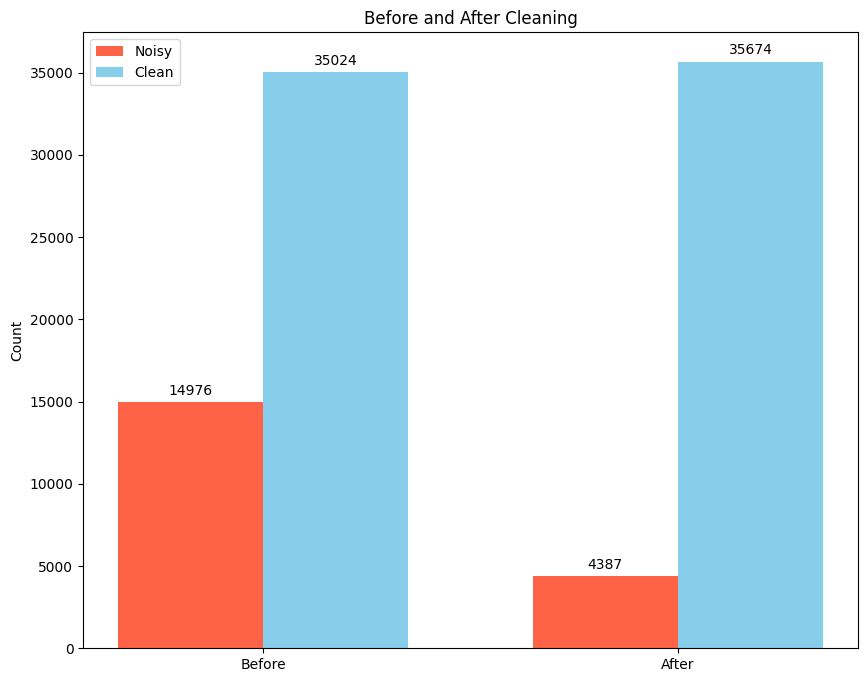

100%|██████████| 40061/40061 [00:01<00:00, 21575.41it/s]


Cleaned dataset saved to cleaned/Advanced-CIFAR10-40.pkl


In [8]:
dataset = CIFAR10(root='data', train=True, download=True)
manual_cleaned = noise_cleaner.advanced_clean(dataset=dataset, mistakes_count=7, relabel_threshold=8)
noise_cleaner.save_cleaned_cifar_dataset_manual(manual_cleaned, 'cleaned', 'Advanced-CIFAR10-40')

### Test

In [1]:
from models.final_model_tester import CIFAR10FinalModelTester

transform_train = transforms.Compose([
    transforms.RandomRotation(degrees=15), # Random rotation within 15 degrees
    transforms.RandomHorizontalFlip(p=0.5), # Random horizontal flip
    transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)), # Width and height shift
    transforms.RandomResizedCrop(size=32, scale=(0.9, 1.0)),  # Zoom-like effect
    transforms.ToTensor(),                        # Convert images to PyTorch tensors
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)) # Normalize
])

test_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
])

cleaned_path = '/kaggle/input/cleanercifar/Advanced-CIFAR10.pkl'
dirty_path = '/kaggle/input/dirtycifar/dirty.pkl'
tester = CIFAR10FinalModelTester(train_dataset_path=cleaned_path, train_transform=transform_train, test_transform=test_transform, 
                                 train_batch_size=512, val_batch_size=512, test_batch_size=512, pretrained=False, lr=0.001, weight_decay=0.0007, 
                                 use_default_train=False, patience=20, warmup_epochs=5, use_lr_scheduler=False, freeze=False, smoothing=0.1)

# lr=0.00015, patience=5, weight_decay=0.00075, 

Dataset size: 43345
Files already downloaded and verified


In [2]:
tester.train(100)

Epoch 1/100:   2%|▏         | 3/170 [00:06<06:15,  2.25s/it]


KeyboardInterrupt: 

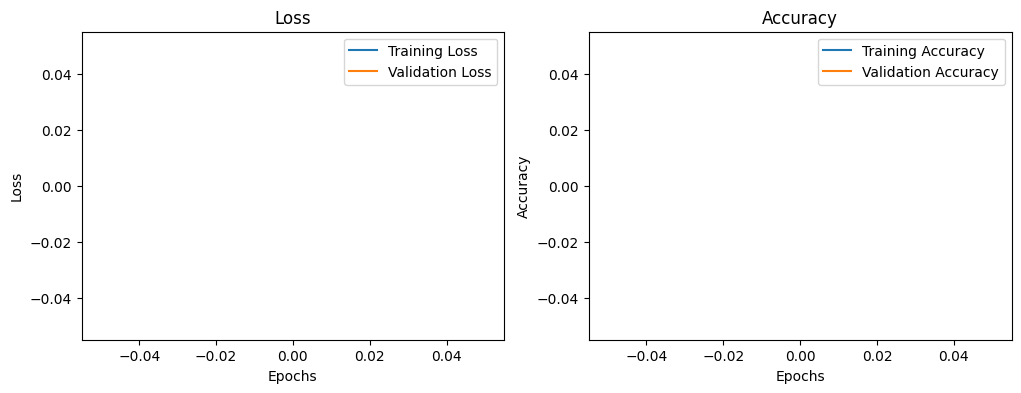

In [7]:
tester.plot_metrics()

In [ ]:
tester.test()

### Etc

In [9]:
from models.dataset import CleanDatasetLoader

cleaned_dataset = CleanDatasetLoader('cleaned/Advanced-CIFAR10.pkl', None)

In [10]:
import matplotlib.pyplot as plt
from PIL import Image
img, label = cleaned_dataset[0]
img = Image.fromarray(img)
img.show()

# # Convert the image tensor to a PIL Image
# try:
#     img = transforms.ToPILImage()(img)
# except:
#     a =2

# # Plot the image
# plt.imshow(img)
# plt.title(f'Label: {label.item()}')
# plt.axis('off')  # Hide axes
# plt.show()

## TMP

In [ ]:
import torch
import torch.functional as F
import torch.nn.functional as F
import torch.nn as nn
from torchvision.models import resnet18, ResNet18_Weights
from torchvision.models import resnet34, ResNet34_Weights
from torchvision.models import resnet50, ResNet50_Weights
from torchvision.models import wide_resnet50_2, Wide_ResNet50_2_Weights
from torchvision.models import vgg16_bn, VGG16_BN_Weights
from torchvision.models import vgg19_bn, VGG19_BN_Weights
from models.preact import *
from models.cnn import CustomCNN
from models.dla import DLA
from torchsummary import summary

pre_trained = True
base_model = nn.Sequential(
                nn.Conv2d(3, 32, 3, stride=1, padding=1),  #out ->  b, 16, 14, 14
                nn.ReLU(True),
                nn.MaxPool2d(kernel_size=2, stride=2),  #out -> b, 16, 8, 8
                
                nn.Conv2d(32, 64, 3, stride=1, padding=1),  #out -> b, 8, 8, 8
                nn.ReLU(True),
                nn.MaxPool2d(kernel_size=2, stride=2, padding=1),  #out -> b, 8, 5, 5
                nn.Flatten(),
                
                nn.Linear(5184, 256),
                nn.ReLU(),
                )
base_model.fc = nn.Flatten()

base_model = base_model.cuda()
if hasattr(base_model, 'fc'):
    base_model.fc = nn.Flatten()
    feature_extractor = base_model
else:
    feature_extractor = nn.Sequential(*list(base_model.children())[:-1])
summary(feature_extractor, (3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             896
              ReLU-2           [-1, 32, 32, 32]               0
         MaxPool2d-3           [-1, 32, 16, 16]               0
            Conv2d-4           [-1, 64, 16, 16]          18,496
              ReLU-5           [-1, 64, 16, 16]               0
         MaxPool2d-6             [-1, 64, 9, 9]               0
           Flatten-7                 [-1, 5184]               0
            Linear-8                  [-1, 256]       1,327,360
              ReLU-9                  [-1, 256]               0
          Flatten-10                  [-1, 256]               0
Total params: 1,346,752
Trainable params: 1,346,752
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 0.90
Params size (MB): 5.14
Estimat

## New Expreiment

In [ ]:
from models.vae import *  # Import your custom VAE model and loss
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from models.dataset import CustomDataset  # Assuming CustomDataset is custom-made

# Define transformations with augmentations
augmented_transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.RandomCrop(size=64, padding=4),  # Random cropping with padding
    transforms.AutoAugment(policy=transforms.autoaugment.AutoAugmentPolicy.CIFAR10),  # AutoAugment for CIFAR10
    transforms.Grayscale(num_output_channels=3),  # Convert to grayscale with 3 channels to match input
    transforms.ToTensor()  # Convert to tensor
])

# Load CIFAR10 dataset
train_dataset = datasets.CIFAR10(root='data', train=True, download=False)

# Wrap the CIFAR10 dataset using CustomDataset (assuming it's necessary)
dataset = CustomDataset(train_dataset, transform=augmented_transform)

# DataLoader with batch size and shuffling (shuffle=True for training)
train_loader = DataLoader(dataset, batch_size=800, shuffle=True)

# Initialize the VAE loss function (MSE reconstruction loss)
vae_loss_fn = VAELoss(reconstruction_loss_type="mse")

# Define VAE parameters
latent_dim = 20
hidden_dim = 256
output_dim = 32*32  # Output feature dimension from ResNet18

# Initialize the VAE model
vae = VAE(latent_dim)

# Use GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
vae = vae.to(device)

# Optimizer (Adam)
optimizer = optim.Adam(vae.parameters(), lr=1e-3)

# Training loop function
def train(epoch):
    vae.train()  # Set the model to training mode
    train_loss = 0  # Track the total loss
    for batch_idx, (data, _) in enumerate(train_loader):
        data = data.to(device)  # Move the data to the GPU if available
        optimizer.zero_grad()  # Reset the gradients
        recon_batch, mu, logvar = vae(data)  # Forward pass through VAE
        loss = vae_loss_fn(recon_batch, data, mu, logvar)  # Calculate VAE loss
        loss.backward()  # Backpropagation
        train_loss += loss.item()  # Accumulate the loss
        optimizer.step()  # Update model parameters

    # Print the average loss for the epoch
    print(f'Epoch {epoch}, Loss: {train_loss / len(train_loader.dataset)}')

# Train the VAE model for 10 epochs
for epoch in range(1, 11):
    train(epoch)

Epoch 1, Loss: 116613.89822875
Epoch 2, Loss: 652.5716528125
Epoch 3, Loss: 568.0243871875
Epoch 4, Loss: 514.767764375
Epoch 5, Loss: 486.0452425
Epoch 6, Loss: 462.51460625
Epoch 7, Loss: 445.3024959375
Epoch 8, Loss: 435.4643065625
Epoch 9, Loss: 421.8742640625
Epoch 10, Loss: 410.498935625


In [ ]:
for epoch in range(11, 251):
    train(epoch)

Epoch 11, Loss: 201.806855
Epoch 12, Loss: 202.6633796875
Epoch 13, Loss: 201.838084375
Epoch 14, Loss: 201.56012296875
Epoch 15, Loss: 201.4204365625
Epoch 16, Loss: 200.68404078125
Epoch 17, Loss: 201.663695
Epoch 18, Loss: 200.3300196875
Epoch 19, Loss: 199.64572921875
Epoch 20, Loss: 199.5438884375
Epoch 21, Loss: 200.0736596875
Epoch 22, Loss: 199.000961875
Epoch 23, Loss: 198.2702909375
Epoch 24, Loss: 198.83876625
Epoch 25, Loss: 198.64641234375
Epoch 26, Loss: 198.174250625
Epoch 27, Loss: 198.654705
Epoch 28, Loss: 197.083101875
Epoch 29, Loss: 197.42817328125
Epoch 30, Loss: 198.018560625
Epoch 31, Loss: 198.42947609375
Epoch 32, Loss: 197.05003609375
Epoch 33, Loss: 196.3795140625
Epoch 34, Loss: 196.21175421875
Epoch 35, Loss: 195.6715984375
Epoch 36, Loss: 195.1604253125
Epoch 37, Loss: 194.5808478125
Epoch 38, Loss: 194.105665625
Epoch 39, Loss: 193.917190625
Epoch 40, Loss: 194.8503015625
Epoch 41, Loss: 194.7926415625
Epoch 42, Loss: 194.34278609375
Epoch 43, Loss: 193.

KeyboardInterrupt: 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import torch

def extract_embeddings(vae: VAE, dataloader, device):
    vae.eval()
    embeddings = []
    labels = []
    
    with torch.no_grad():
        for data, targets in dataloader:
            data = data.to(device)
            z = vae.latent_embedding(data)
            embeddings.append(z.cpu().numpy())
            labels.append(targets.numpy())

    embeddings = np.concatenate(embeddings, axis=0)
    labels = np.concatenate(labels, axis=0)
    return embeddings, labels

def apply_tsne(embeddings):
    tsne = TSNE(n_components=2, random_state=0)
    embeddings_2d = tsne.fit_transform(embeddings)
    return embeddings_2d

def plot_embeddings(embeddings_2d, labels):
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c=labels, cmap='viridis', alpha=0.5)
    plt.colorbar(scatter)
    plt.title('2D t-SNE of VAE Embeddings')
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.show()


In [ ]:
embeddings, labels = extract_embeddings(vae, train_loader, device)
embeddings_2d = apply_tsne(embeddings)
plot_embeddings(embeddings_2d, labels)

KeyboardInterrupt: 

## Animal10N

In [ ]:
from models.dataset import Animal10NDataset
from models.siamese_tester import SiameseTester
from models.siamese import *
from models.predefined import InstanceDependentNoiseAdder
from torchvision import transforms
from torchvision.datasets import FashionMNIST, CIFAR10, CIFAR100, MNIST
from models.cleaner import NoiseCleaner
from models.predictor import Predictor

train_dataset = Animal10NDataset('data/Animal10N/training')
test_dataset = Animal10NDataset('data/Animal10N/testing')
transform = transforms.Compose([
                                #transforms.Grayscale(num_output_channels=3),
                                transforms.ToTensor()])
augmented_transform = transforms.Compose([
                                transforms.RandomCrop(size=64, padding=4),
                                #transforms.Grayscale(num_output_channels=3),
                                transforms.ToTensor()])
noise_cleaner = NoiseCleaner(train_dataset, noise_type='none', model_save_path="cifar10/resnet34/model_resnet34_cifar10_fold_{}.pth", 
                             inner_folds_num=10, outer_folds_num=10, model='vgg19-bn', train_noise_level=0, epochs_num=500, train_pairs=200000, 
                             val_pairs=10000, embedding_dimension=128, lr=1e-3, optimizer='Adam', patience=7, transform=transform,
                             weight_decay=0.0005, training_batch_size=450, pre_trained=False, dropout_prob=0.2, contrastive_ratio=1,
                             distance_meter='euclidian', augmented_transform=augmented_transform, trainable=True, pair_validation=False,
                             label_smoothing=0.1, loss='ce', cnn_size=None)

In [ ]:
noise_cleaner.clean()

Seed: 74


Epoch 17/50:  32%|███▏      | 16/50 [00:40<01:25,  2.52s/it, train_loss=4.99, val_loss=4.96, val_accuracy=12.8]

Early stopping triggered
Loading best model from checkpoint...
best accuracy: 12.75


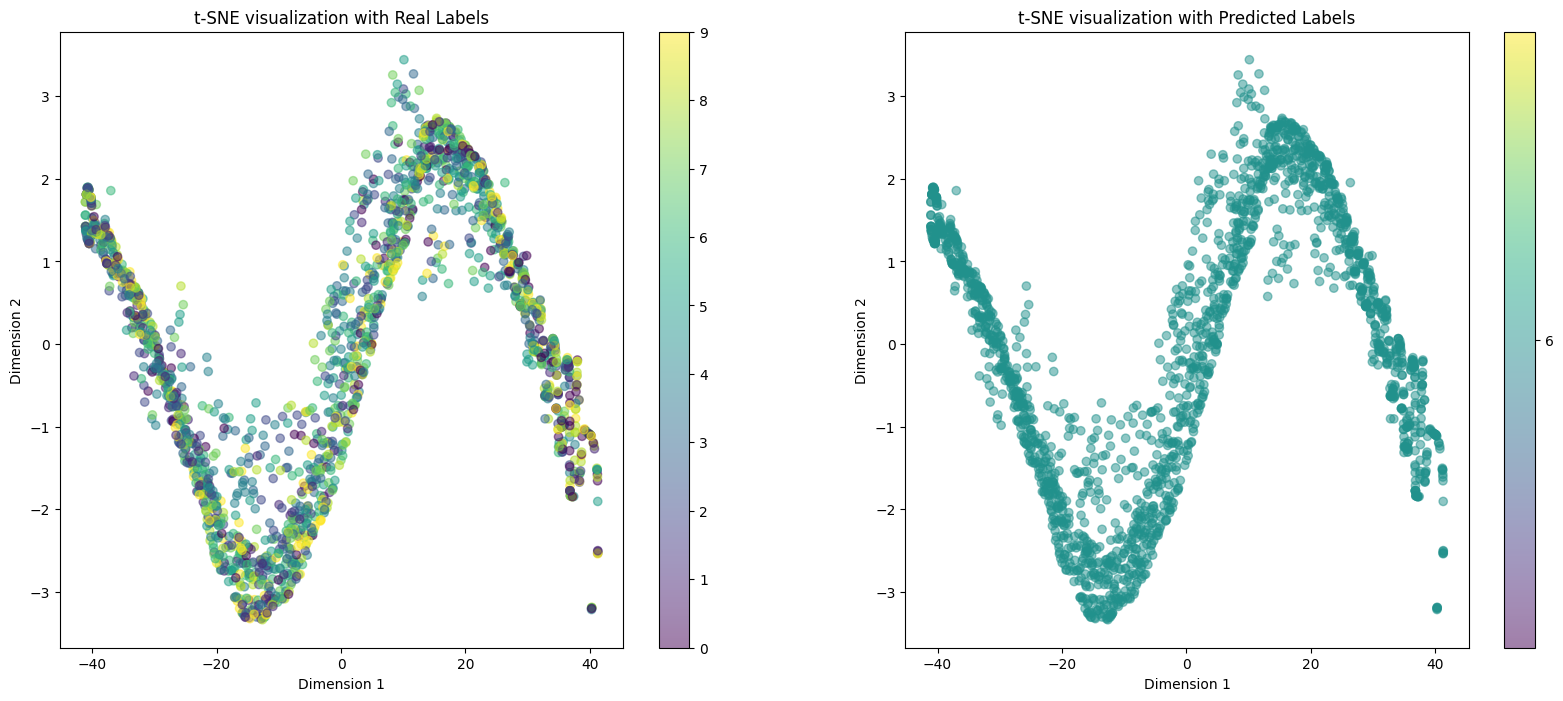

In [ ]:
from models.siamese_tester import SiameseTester
from models.siamese import *
from models.predefined import InstanceDependentNoiseAdder

transform = transforms.Compose([                                
                                transforms.RandomCrop(size=32, padding=4),
                                transforms.RandomHorizontalFlip(),
                                transforms.Grayscale(num_output_channels=3),
                                transforms.ToTensor()])
augmented_transform = transforms.Compose([
                                transforms.Grayscale(num_output_channels=3),
                                transforms.ToTensor()])
train_dataset = CIFAR10(root='data', train=True, download=False)
train_noise_adder = InstanceDependentNoiseAdder(train_dataset, image_size=3072, ratio=0.2, num_classes=10)
train_noise_adder.add_noise()
tester = SiameseTester(train_dataset, SiameseNetwork, transform=transform, augmented_transform=augmented_transform)
tester.train(50)

In [ ]:
transform = transforms.Compose([transforms.RandomCrop(32, padding=4), transforms.RandomHorizontalFlip(), transforms.ToTensor()])

In [ ]:
clean_train_dataset = noise_cleaner.clean_dataset
test_dataset = CIFAR10(root='data', train=False, download=False)
predictor = Predictor(train_dataset=clean_train_dataset, test_dataset=test_dataset, transform=transform, num_classes=10, 
                      model_type='resnet18', batch_size=2048, pre_trained=True, weight_decay=0.0005)

In [ ]:
predictor.train(120)

In [ ]:
predictor.evaluate()

Evaluating: 100%|██████████| 5/5 [00:01<00:00,  4.70it/s]

Test Accuracy: 77.23%


0.7723

In [ ]:
predictor.free_model()

In [ ]:
for i in range(5):
    predictor.train(2)
    predictor.evaluate()